In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import time
import math
import random
import copy
import warnings
warnings.filterwarnings('ignore')

import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import datasets, layers, models
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from sklearn.cluster import KMeans, AgglomerativeClustering
#from tensorflow.keras.datasets import cifar10 
from keras.datasets import fashion_mnist 
from sklearn.metrics import silhouette_samples, silhouette_score

mod = sys.modules[__name__]

## main_num_dataset = 200
## other_num_dataset = 10

In [2]:
acc0 = [[0.47369998693466187, 0.0982000008225441, 0.421999990940094, 0.12430000305175781, 0.5361999869346619, 0.32510000467300415, 0.24230000376701355, 0.6746000051498413, 0.2694999873638153, 0.1446000039577484, 0.0982000008225441, 0.45100000500679016, 0.24529999494552612, 0.5863000154495239, 0.44290000200271606, 0.6118999719619751, 0.18299999833106995, 0.4916999936103821, 0.0982000008225441, 0.677299976348877, 0.302700012922287, 0.29739999771118164, 0.5534999966621399, 0.6010000109672546, 0.6219000220298767, 0.0982000008225441, 0.26930001378059387, 0.18960000574588776, 0.6534000039100647, 0.6565999984741211], [0.6563000082969666, 0.3653999865055084, 0.5770000219345093, 0.6674000024795532, 0.4122999906539917, 0.367000013589859, 0.5803999900817871, 0.0982000008225441, 0.5778999924659729, 0.3206000030040741, 0.545199990272522, 0.36489999294281006, 0.29339998960494995, 0.41029998660087585, 0.2711000144481659, 0.46070000529289246, 0.3221000134944916, 0.19629999995231628, 0.388700008392334, 0.722100019454956, 0.5995000004768372, 0.6118000149726868, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.30059999227523804, 0.3691999912261963, 0.3562999963760376, 0.19709999859333038, 0.46059998869895935], [0.08919999748468399, 0.3905999958515167, 0.5842999815940857, 0.40529999136924744, 0.2475000023841858, 0.2531999945640564, 0.08919999748468399, 0.4002000093460083, 0.08919999748468399, 0.6046000123023987, 0.08919999748468399, 0.5864999890327454, 0.5591999888420105, 0.08919999748468399, 0.4471000134944916, 0.08919999748468399, 0.3603000044822693, 0.17319999635219574, 0.5910999774932861, 0.08919999748468399, 0.18490000069141388, 0.6003999710083008, 0.4424999952316284, 0.4440999925136566, 0.45260000228881836, 0.44040000438690186, 0.4359000027179718, 0.545199990272522, 0.08919999748468399, 0.08919999748468399], [0.6783999800682068, 0.08919999748468399, 0.4390999972820282, 0.08919999748468399, 0.37439998984336853, 0.34769999980926514, 0.08919999748468399, 0.4374000132083893, 0.7523000240325928, 0.08919999748468399, 0.6697999835014343, 0.2011999934911728, 0.08919999748468399, 0.7099999785423279, 0.2671000063419342, 0.1843000054359436, 0.5943999886512756, 0.3953000009059906, 0.26829999685287476, 0.15639999508857727, 0.2434999942779541, 0.6241999864578247, 0.16940000653266907, 0.08919999748468399, 0.642300009727478, 0.08919999748468399, 0.1851000040769577, 0.27559998631477356, 0.2770000100135803, 0.6107000112533569], [0.20270000398159027, 0.5982000231742859, 0.5999000072479248, 0.20409999787807465, 0.2045000046491623, 0.3127000033855438, 0.3772999942302704, 0.3815999925136566, 0.6258000135421753, 0.5799999833106995, 0.5436000227928162, 0.5774000287055969, 0.6869000196456909, 0.3813000023365021, 0.11349999904632568, 0.6365000009536743, 0.4383000135421753, 0.43709999322891235, 0.6848000288009644, 0.19480000436306, 0.4544000029563904, 0.11349999904632568, 0.3400000035762787, 0.24979999661445618, 0.20960000157356262, 0.3066999912261963, 0.11349999904632568, 0.4499000012874603, 0.2053000032901764, 0.2808000147342682], [0.6407999992370605, 0.11349999904632568, 0.11349999904632568, 0.39559999108314514, 0.22310000658035278, 0.527999997138977, 0.22429999709129333, 0.2087000012397766, 0.3903999924659729, 0.3790000081062317, 0.3474999964237213, 0.21299999952316284, 0.7675999999046326, 0.367000013589859, 0.677299976348877, 0.3767000138759613, 0.3021000027656555, 0.4878999888896942, 0.20589999854564667, 0.31029999256134033, 0.41999998688697815, 0.2833000123500824, 0.3774000108242035, 0.7774999737739563, 0.5228999853134155, 0.6535000205039978, 0.7174000144004822, 0.5268999934196472, 0.4381999969482422, 0.7081000208854675], [0.3668000102043152, 0.7174000144004822, 0.27649998664855957, 0.4993000030517578, 0.578000009059906, 0.29649999737739563, 0.5016999840736389, 0.33809998631477356, 0.43630000948905945, 0.6373000144958496, 0.6376000046730042, 0.27480000257492065, 0.6028000116348267, 0.22339999675750732, 0.5654000043869019, 0.33809998631477356, 0.6121000051498413, 0.4560000002384186, 0.4909000098705292, 0.5418999791145325, 0.482699990272522, 0.47540000081062317, 0.5853999853134155, 0.7728999853134155, 0.6327000260353088, 0.5637999773025513, 0.7199000120162964, 0.5231999754905701, 0.4471000134944916, 0.34619998931884766], [0.21459999680519104, 0.7294999957084656, 0.660099983215332, 0.6789000034332275, 0.7677000164985657, 0.6563000082969666, 0.28940001130104065, 0.6204000115394592, 0.263700008392334, 0.4287000000476837, 0.6155999898910522, 0.7382000088691711, 0.6549000144004822, 0.6546000242233276, 0.49889999628067017, 0.1889999955892563, 0.20730000734329224, 0.445499986410141, 0.741599977016449, 0.777899980545044, 0.7865999937057495, 0.3165000081062317, 0.6331999897956848, 0.5256999731063843, 0.6309999823570251, 0.722100019454956, 0.5681999921798706, 0.2337999939918518, 0.7986000180244446, 0.3573000133037567], [0.38199999928474426, 0.7875000238418579, 0.6396999955177307, 0.11180000007152557, 0.720300018787384, 0.5282999873161316, 0.11699999868869781, 0.2556999921798706, 0.5684999823570251, 0.4875999987125397, 0.4293999969959259, 0.3752000033855438, 0.6208999752998352, 0.5133000016212463, 0.5153999924659729, 0.28850001096725464, 0.7483000159263611, 0.6032999753952026, 0.25130000710487366, 0.7329999804496765, 0.3449000120162964, 0.19859999418258667, 0.5641999840736389, 0.10220000147819519, 0.7791000008583069, 0.3725999891757965, 0.10189999639987946, 0.4172999858856201, 0.5421000123023987, 0.5625], [0.4772999882698059, 0.3646000027656555, 0.7914999723434448, 0.38609999418258667, 0.8144999742507935, 0.1835000067949295, 0.16820000112056732, 0.22130000591278076, 0.71670001745224, 0.717199981212616, 0.41749998927116394, 0.4000000059604645, 0.5618000030517578, 0.8183000087738037, 0.37369999289512634, 0.4104999899864197, 0.4099999964237213, 0.17880000174045563, 0.7488999962806702, 0.8151999711990356, 0.10649999976158142, 0.2824000120162964, 0.7574999928474426, 0.7019000053405762, 0.4629000127315521, 0.10170000046491623, 0.5584999918937683, 0.6534000039100647, 0.3621000051498413, 0.738099992275238], [0.6581000089645386, 0.09740000218153, 0.09969999641180038, 0.6592000126838684, 0.7110000252723694, 0.8241000175476074, 0.3855000138282776, 0.22939999401569366, 0.6646000146865845, 0.8446000218391418, 0.5554999709129333, 0.09740000218153, 0.18970000743865967, 0.17080000042915344, 0.5576000213623047, 0.2662000060081482, 0.6359000205993652, 0.6970999836921692, 0.6504999995231628, 0.09740000218153, 0.46149998903274536, 0.47049999237060547, 0.751800000667572, 0.7218000292778015, 0.3598000109195709, 0.41769999265670776, 0.39800000190734863, 0.28949999809265137, 0.5669000148773193, 0.8392999768257141], [0.5914000272750854, 0.45489999651908875, 0.8389999866485596, 0.5879999995231628, 0.22540000081062317, 0.3050000071525574, 0.09749999642372131, 0.09769999980926514, 0.09830000251531601, 0.6832000017166138, 0.31299999356269836, 0.7524999976158142, 0.42329999804496765, 0.6398000121116638, 0.570900022983551, 0.2071000039577484, 0.09799999743700027, 0.5152999758720398, 0.821399986743927, 0.5098000168800354, 0.09799999743700027, 0.6956999897956848, 0.09920000284910202, 0.43470001220703125, 0.734000027179718, 0.79339998960495, 0.09740000218153, 0.24320000410079956, 0.7980999946594238, 0.7512000203132629], [0.6987000107765198, 0.4945000112056732, 0.576200008392334, 0.6736000180244446, 0.7440000176429749, 0.17059999704360962, 0.7246000170707703, 0.8543999791145325, 0.6442999839782715, 0.20440000295639038, 0.8127999901771545, 0.1509999930858612, 0.3248000144958496, 0.2531999945640564, 0.23520000278949738, 0.9017999768257141, 0.16859999299049377, 0.5282999873161316, 0.4377000033855438, 0.5935999751091003, 0.44780001044273376, 0.7595000267028809, 0.8051000237464905, 0.781000018119812, 0.8313999772071838, 0.6699000000953674, 0.8064000010490417, 0.7267000079154968, 0.2231999933719635, 0.6717000007629395], [0.4180999994277954, 0.18449999392032623, 0.5414999723434448, 0.5267999768257141, 0.8187000155448914, 0.8299000263214111, 0.5468999743461609, 0.6790000200271606, 0.551800012588501, 0.6180999875068665, 0.6514000296592712, 0.8148999810218811, 0.756600022315979, 0.7506999969482422, 0.6190999746322632, 0.391400009393692, 0.4964999854564667, 0.8909000158309937, 0.8963000178337097, 0.7360000014305115, 0.4113999903202057, 0.5680000185966492, 0.8598999977111816, 0.8041999936103821, 0.7192000150680542, 0.7670000195503235, 0.2833000123500824, 0.12970000505447388, 0.7317000031471252, 0.6607000231742859], [0.8299000263214111, 0.7674999833106995, 0.7922999858856201, 0.44679999351501465, 0.6209999918937683, 0.7221999764442444, 0.7271000146865845, 0.7617999911308289, 0.8817999958992004, 0.4196000099182129, 0.6503999829292297, 0.7389000058174133, 0.7860999703407288, 0.6449999809265137, 0.5928999781608582, 0.6815000176429749, 0.7915999889373779, 0.6671000123023987, 0.8004999756813049, 0.6960999965667725, 0.7791000008583069, 0.6546000242233276, 0.41940000653266907, 0.8464999794960022, 0.7383999824523926, 0.8285999894142151, 0.758899986743927, 0.5230000019073486, 0.5640000104904175, 0.37369999289512634], [0.2870999872684479, 0.546500027179718, 0.44440001249313354, 0.4374000132083893, 0.6671000123023987, 0.8212000131607056, 0.6664999723434448, 0.7712000012397766, 0.6171000003814697, 0.6690999865531921, 0.7469000220298767, 0.4918999969959259, 0.5307999849319458, 0.7786999940872192, 0.39160001277923584, 0.5909000039100647, 0.8406000137329102, 0.7710999846458435, 0.2955000102519989, 0.676800012588501, 0.7347999811172485, 0.7595000267028809, 0.6948000192642212, 0.6294000148773193, 0.6782000064849854, 0.390500009059906, 0.8490999937057495, 0.5432999730110168, 0.6322000026702881, 0.7763000130653381], [0.131400004029274, 0.47279998660087585, 0.8550999760627747, 0.17800000309944153, 0.16689999401569366, 0.3700999915599823, 0.8758000135421753, 0.1509000062942505, 0.8496000170707703, 0.9273999929428101, 0.3230000138282776, 0.5115000009536743, 0.4514999985694885, 0.746399998664856, 0.2037000060081482, 0.8622000217437744, 0.8065000176429749, 0.853600025177002, 0.3050000071525574, 0.23109999299049377, 0.21789999306201935, 0.7893000245094299, 0.2662000060081482, 0.6820999979972839, 0.8422999978065491, 0.7178000211715698, 0.8472999930381775, 0.7682999968528748, 0.83160001039505, 0.8934000134468079], [0.3138999938964844, 0.52920001745224, 0.5602999925613403, 0.1728000044822693, 0.8959000110626221, 0.6948999762535095, 0.5498999953269958, 0.8400999903678894, 0.840399980545044, 0.704200029373169, 0.35429999232292175, 0.8901000022888184, 0.25540000200271606, 0.4117000102996826, 0.6444000005722046, 0.6717000007629395, 0.835099995136261, 0.6322000026702881, 0.35580000281333923, 0.49129998683929443, 0.3100000023841858, 0.3361999988555908, 0.8098000288009644, 0.8525000214576721, 0.6543999910354614, 0.6229000091552734, 0.8188999891281128, 0.696399986743927, 0.3278999924659729, 0.6241000294685364], [0.7231000065803528, 0.5803999900817871, 0.5151000022888184, 0.43380001187324524, 0.6625999808311462, 0.656000018119812, 0.6773999929428101, 0.621399998664856, 0.8252999782562256, 0.8184999823570251, 0.8240000009536743, 0.7376999855041504, 0.7139999866485596, 0.5406000018119812, 0.17229999601840973, 0.8126999735832214, 0.7519000172615051, 0.8705000281333923, 0.7222999930381775, 0.35420000553131104, 0.4577000141143799, 0.9193999767303467, 0.7139000296592712, 0.8508999943733215, 0.7599999904632568, 0.42640000581741333, 0.8373000025749207, 0.6883999705314636, 0.9053999781608582, 0.8601999878883362], [0.6141999959945679, 0.8287000060081482, 0.9204000234603882, 0.5489000082015991, 0.8055999875068665, 0.8805000185966492, 0.8119000196456909, 0.8489000201225281, 0.6328999996185303, 0.5238000154495239, 0.6906999945640564, 0.8188999891281128, 0.6226999759674072, 0.7627999782562256, 0.805400013923645, 0.6582000255584717, 0.9118000268936157, 0.6948000192642212, 0.9063000082969666, 0.7886999845504761, 0.7922000288963318, 0.5807999968528748, 0.7242000102996826, 0.852400004863739, 0.8317000269889832, 0.8353999853134155, 0.7627000212669373, 0.5234000086784363, 0.6273999810218811, 0.7524999976158142]]
loss0 = [[6.160638809204102, 244.4258270263672, 4.330185413360596, 9.501973152160645, 5.795341491699219, 9.622787475585938, 9.413814544677734, 2.387752056121826, 11.12941837310791, 12.277214050292969, 241.85569763183594, 9.363637924194336, 10.680830001831055, 3.274284601211548, 12.712991714477539, 4.521945476531982, 7.346052169799805, 7.342510223388672, 244.61709594726562, 2.3515453338623047, 18.453460693359375, 14.357462882995605, 4.337387561798096, 5.878810882568359, 1.5301134586334229, 237.68130493164062, 20.790699005126953, 52.22090148925781, 3.6914002895355225, 2.6462531089782715], [4.404819488525391, 11.792401313781738, 3.2516353130340576, 3.546431541442871, 8.19491958618164, 13.24193286895752, 2.6697492599487305, 142.87538146972656, 5.159709930419922, 6.832319736480713, 6.259641647338867, 13.072129249572754, 12.559191703796387, 9.253829956054688, 12.906635284423828, 5.270575046539307, 8.181232452392578, 20.75389289855957, 7.9676594734191895, 2.371785879135132, 4.781115531921387, 4.046662330627441, 73.47573852539062, 139.19863891601562, 52.94358825683594, 28.703659057617188, 11.823934555053711, 9.712879180908203, 13.915766716003418, 9.982577323913574], [16.251548767089844, 5.96328067779541, 3.847409725189209, 3.3176112174987793, 4.922674655914307, 9.811145782470703, 19.20551872253418, 5.220895290374756, 19.47528839111328, 2.646740198135376, 16.508499145507812, 2.9597716331481934, 5.026124000549316, 19.883094787597656, 7.415642738342285, 18.675426483154297, 8.023859977722168, 13.767731666564941, 5.171197414398193, 16.422325134277344, 7.205353260040283, 3.8655433654785156, 4.970292568206787, 6.008981704711914, 4.631378650665283, 4.626112461090088, 4.825195789337158, 5.1810760498046875, 19.468141555786133, 20.69146728515625], [4.517707347869873, 61.856624603271484, 7.702116966247559, 72.23554229736328, 8.198395729064941, 6.522584915161133, 78.85507202148438, 9.69459342956543, 1.6112929582595825, 63.65333938598633, 3.5202295780181885, 19.086933135986328, 60.542301177978516, 2.5028653144836426, 11.221135139465332, 18.780672073364258, 3.4073781967163086, 5.034609794616699, 7.7941484451293945, 30.20591926574707, 9.05649185180664, 6.121720790863037, 8.161653518676758, 81.90027618408203, 2.6156346797943115, 82.17455291748047, 16.280258178710938, 14.629261016845703, 9.497162818908691, 3.7236995697021484], [18.838525772094727, 2.518605947494507, 3.046388864517212, 4.937699317932129, 35.22236251831055, 4.012671947479248, 2.5356788635253906, 3.035287380218506, 1.8174668550491333, 2.457814931869507, 2.696781635284424, 2.8049538135528564, 1.7604800462722778, 3.6601250171661377, 34.03549575805664, 2.417513608932495, 2.9270646572113037, 2.1957571506500244, 2.2201292514801025, 6.563581943511963, 2.7990481853485107, 36.26394271850586, 10.765320777893066, 9.001769065856934, 11.45800495147705, 5.097038269042969, 33.719730377197266, 3.5214359760284424, 18.632139205932617, 6.893458366394043], [3.3100929260253906, 50.626678466796875, 43.7505989074707, 6.059139251708984, 6.508062362670898, 4.435649394989014, 8.330554962158203, 18.258689880371094, 4.286936283111572, 7.188481330871582, 3.276430368423462, 8.428014755249023, 1.3908758163452148, 6.654274940490723, 2.217503309249878, 7.278654098510742, 8.176416397094727, 7.404767036437988, 16.865154266357422, 9.458063125610352, 5.843397617340088, 13.0894136428833, 4.1390886306762695, 1.398962140083313, 7.706245422363281, 2.5962300300598145, 1.737901210784912, 3.4326117038726807, 6.152674198150635, 1.7549220323562622], [4.087745666503906, 1.5913174152374268, 7.055030345916748, 2.6759092807769775, 2.984192371368408, 8.449050903320312, 2.221436023712158, 3.3060898780822754, 3.1111321449279785, 2.0499963760375977, 2.1926069259643555, 10.275389671325684, 3.654400110244751, 7.660149097442627, 3.28439998626709, 6.78378963470459, 3.265726327896118, 3.4880285263061523, 3.239332437515259, 4.269807815551758, 4.4754486083984375, 4.233973026275635, 2.2346181869506836, 1.3534451723098755, 2.7824504375457764, 2.488953113555908, 1.4379860162734985, 4.716830253601074, 5.078311920166016, 5.194225311279297], [8.625957489013672, 1.6219539642333984, 2.0480005741119385, 1.5553479194641113, 1.73921537399292, 3.1467838287353516, 4.254451751708984, 4.126805305480957, 7.319464206695557, 3.862032890319824, 2.9840545654296875, 1.4059364795684814, 2.4631969928741455, 1.7176085710525513, 3.155022621154785, 19.368331909179688, 4.71351432800293, 2.952432155609131, 1.6130834817886353, 1.2278929948806763, 1.2704988718032837, 5.270386219024658, 4.7575201988220215, 2.786240816116333, 4.428975582122803, 1.5832165479660034, 3.086730718612671, 10.824584007263184, 1.0702533721923828, 5.707315444946289], [4.254486083984375, 1.744648814201355, 2.745129108428955, 11.37605094909668, 1.9630523920059204, 4.5906476974487305, 11.188071250915527, 4.838241100311279, 3.9775753021240234, 4.291948318481445, 3.0842702388763428, 4.032642364501953, 3.416544198989868, 4.0583696365356445, 2.8907389640808105, 6.381038665771484, 1.3351792097091675, 2.990539073944092, 7.226561546325684, 1.5310896635055542, 5.468209266662598, 14.36885929107666, 2.541687488555908, 11.842411994934082, 0.9299834966659546, 6.110785007476807, 13.26937198638916, 4.198934078216553, 6.93358850479126, 3.898195266723633], [2.8754162788391113, 5.704920291900635, 1.0592349767684937, 4.257288932800293, 1.185824990272522, 19.76913833618164, 26.356821060180664, 9.680094718933105, 2.175762414932251, 2.464473247528076, 5.20421838760376, 5.385752201080322, 4.26426362991333, 1.511399507522583, 5.080205917358398, 7.394395351409912, 4.356250286102295, 20.01102638244629, 1.9800190925598145, 1.1474984884262085, 37.96670150756836, 16.01525115966797, 1.7064123153686523, 2.3551547527313232, 4.324368953704834, 40.162349700927734, 4.472587585449219, 1.8346261978149414, 6.953131198883057, 1.760759711265564], [1.7394050359725952, 23.37428092956543, 13.42902660369873, 1.5401602983474731, 1.9954243898391724, 0.7834588289260864, 3.921207904815674, 9.904806137084961, 1.317483901977539, 0.684418797492981, 1.6454187631607056, 19.356355667114258, 16.767900466918945, 9.083660125732422, 3.561309337615967, 6.918859958648682, 2.252614736557007, 1.448908805847168, 2.079345941543579, 17.265615463256836, 3.247742176055908, 3.499004602432251, 1.3711045980453491, 1.2071146965026855, 6.598124980926514, 3.6253063678741455, 3.3054769039154053, 12.819653511047363, 1.9392892122268677, 0.6056634783744812], [2.2925379276275635, 4.453169345855713, 0.8615626692771912, 3.2295944690704346, 13.756453514099121, 18.817590713500977, 57.73419189453125, 48.54447937011719, 38.96452713012695, 2.0137858390808105, 5.952866554260254, 1.3606423139572144, 5.408271789550781, 1.9587898254394531, 1.7226388454437256, 14.8964262008667, 46.434200286865234, 3.5590600967407227, 0.9004572033882141, 4.677269458770752, 28.538074493408203, 1.7113165855407715, 36.2797737121582, 5.8505330085754395, 1.3362525701522827, 0.8334159255027771, 45.48991775512695, 16.02433204650879, 0.8027955293655396, 1.6010209321975708], [1.4109305143356323, 1.948804497718811, 1.6093850135803223, 1.0350412130355835, 0.8909613490104675, 8.354657173156738, 1.5326306819915771, 0.5949012637138367, 1.7784987688064575, 6.260433673858643, 0.9242634773254395, 7.626823425292969, 4.950577735900879, 7.832595348358154, 7.368034362792969, 0.3791009783744812, 6.206280708312988, 1.8486812114715576, 3.1673715114593506, 3.230419635772705, 3.7998292446136475, 1.3423993587493896, 0.8514731526374817, 1.2122503519058228, 0.6277784705162048, 1.1959341764450073, 0.7721020579338074, 0.955000102519989, 10.760986328125, 1.5935133695602417], [4.768636226654053, 14.138429641723633, 3.110609769821167, 2.6330277919769287, 0.9234738349914551, 0.8963479399681091, 2.0417227745056152, 1.160761833190918, 2.237321615219116, 2.6487975120544434, 1.9994336366653442, 1.488389015197754, 1.0576722621917725, 1.3615726232528687, 2.58642578125, 8.55345630645752, 2.7931272983551025, 0.5346810817718506, 0.6646068692207336, 1.9042363166809082, 4.769280910491943, 3.9544241428375244, 0.834861695766449, 0.7622160911560059, 1.0519382953643799, 1.1228394508361816, 9.4468994140625, 23.06243133544922, 1.8139272928237915, 1.4115833044052124], [0.7908817529678345, 0.9379062652587891, 1.3519842624664307, 3.8159713745117188, 1.6649439334869385, 1.8633314371109009, 1.5119328498840332, 0.9879114031791687, 0.6461992859840393, 8.72786808013916, 3.7842354774475098, 1.004042387008667, 1.0184438228607178, 1.646552324295044, 2.0387535095214844, 2.190868854522705, 0.8228906393051147, 1.752597451210022, 0.9282416105270386, 1.9198211431503296, 1.2542678117752075, 2.8613874912261963, 5.611268520355225, 0.8312073945999146, 1.3052849769592285, 0.7003677487373352, 1.2405545711517334, 2.471853494644165, 2.475311756134033, 9.657386779785156], [11.868183135986328, 2.9464142322540283, 7.376784324645996, 5.944667339324951, 1.7026560306549072, 0.8988898396492004, 1.670656442642212, 1.0469136238098145, 2.37247633934021, 2.1867053508758545, 1.439820647239685, 3.0987114906311035, 1.7092080116271973, 1.0301932096481323, 4.160478591918945, 2.492388963699341, 0.6259165406227112, 1.4754574298858643, 12.094426155090332, 1.827290415763855, 1.5898785591125488, 0.858589768409729, 1.8754408359527588, 2.427677631378174, 2.4906744956970215, 7.263423442840576, 0.8156206011772156, 5.611779689788818, 1.936367392539978, 1.0367401838302612], [6.196019172668457, 2.196404218673706, 0.5571136474609375, 10.722813606262207, 6.40725040435791, 4.720121383666992, 0.5753207802772522, 6.7717790603637695, 0.5154687166213989, 0.3182160258293152, 5.103888511657715, 2.0038318634033203, 2.820455551147461, 1.0903874635696411, 5.687460899353027, 0.6334092617034912, 0.8562772274017334, 0.6056243181228638, 4.234402179718018, 7.103076457977295, 4.811452388763428, 0.7212690114974976, 3.1998770236968994, 1.576464295387268, 0.6579784750938416, 1.2005482912063599, 0.6481382250785828, 0.919176459312439, 1.054064154624939, 0.39519205689430237], [6.517140865325928, 3.94069766998291, 2.2869484424591064, 16.761445999145508, 0.5375493764877319, 2.084904670715332, 2.977560043334961, 0.7466484308242798, 0.8655918836593628, 1.4855787754058838, 4.50875997543335, 0.4725097119808197, 12.444710731506348, 6.177197456359863, 2.3463335037231445, 1.8551768064498901, 1.0445926189422607, 2.038771390914917, 4.799920558929443, 3.4885094165802, 6.191014289855957, 4.575704097747803, 1.4314302206039429, 0.7806051969528198, 1.8064340353012085, 2.8750686645507812, 0.8098574876785278, 2.55759596824646, 5.04044246673584, 2.1523075103759766], [1.2994004487991333, 4.088827133178711, 2.708785057067871, 6.383314609527588, 1.9682402610778809, 1.5132853984832764, 1.502377986907959, 3.697176218032837, 0.6076067090034485, 0.6029054522514343, 0.7624652981758118, 0.8280705809593201, 1.1266549825668335, 3.7227909564971924, 17.908708572387695, 0.7916273474693298, 1.4059817790985107, 0.5192171335220337, 1.1883785724639893, 10.795511245727539, 9.40780258178711, 0.31587091088294983, 1.511393427848816, 0.5222212672233582, 1.1528725624084473, 9.454894065856934, 0.6244977712631226, 1.5097832679748535, 0.435642808675766, 0.5186280608177185], [1.7763307094573975, 0.6947320699691772, 0.2964121699333191, 2.622011423110962, 0.6179715394973755, 0.41917353868484497, 0.8821802735328674, 0.6081137657165527, 3.011227607727051, 2.901616096496582, 1.238120198249817, 0.9430416226387024, 1.5284345149993896, 1.510215401649475, 0.8878620862960815, 1.4760016202926636, 0.3950011432170868, 1.9992234706878662, 0.37415844202041626, 0.9450903534889221, 0.7850873470306396, 6.326287746429443, 1.3637741804122925, 0.7446886301040649, 0.5822722315788269, 1.1884976625442505, 1.2728906869888306, 2.7452402114868164, 3.3599483966827393, 1.5854874849319458]] 

acc1 = [[0.5329999923706055, 0.4058000147342682, 0.3346000015735626, 0.08919999748468399, 0.5175999999046326, 0.33709999918937683, 0.1446000039577484, 0.08919999748468399, 0.5612000226974487, 0.14010000228881836, 0.16040000319480896, 0.08919999748468399, 0.08919999748468399, 0.1768999993801117, 0.5206000208854675, 0.4616999924182892, 0.08919999748468399, 0.510699987411499, 0.30570000410079956, 0.45100000500679016, 0.4316999912261963, 0.3124000132083893, 0.5590999722480774, 0.23499999940395355, 0.49729999899864197, 0.46799999475479126, 0.14010000228881836, 0.4221999943256378, 0.08919999748468399, 0.28630000352859497], [0.21230000257492065, 0.08919999748468399, 0.5205000042915344, 0.4496000111103058, 0.5519999861717224, 0.32010000944137573, 0.24279999732971191, 0.18880000710487366, 0.09229999780654907, 0.1996999979019165, 0.2524000108242035, 0.08919999748468399, 0.4032999873161316, 0.1889999955892563, 0.16979999840259552, 0.267300009727478, 0.427700012922287, 0.08919999748468399, 0.08919999748468399, 0.34619998931884766, 0.4950999915599823, 0.25999999046325684, 0.2621000111103058, 0.43130001425743103, 0.4869999885559082, 0.4058000147342682, 0.3594000041484833, 0.5462999939918518, 0.41119998693466187, 0.5224999785423279], [0.3693999946117401, 0.6324999928474426, 0.38100001215934753, 0.20309999585151672, 0.17730000615119934, 0.5353000164031982, 0.2632000148296356, 0.4722999930381775, 0.6561999917030334, 0.28369998931884766, 0.6355999708175659, 0.26600000262260437, 0.3896999955177307, 0.6305000185966492, 0.6302000284194946, 0.3483000099658966, 0.10090000182390213, 0.5041999816894531, 0.34850001335144043, 0.10090000182390213, 0.6553999781608582, 0.4147999882698059, 0.5526999831199646, 0.35569998621940613, 0.5611000061035156, 0.7531999945640564, 0.274399995803833, 0.3668000102043152, 0.1762000024318695, 0.7351999878883362], [0.603600025177002, 0.26100000739097595, 0.7268000245094299, 0.708899974822998, 0.3734999895095825, 0.45410001277923584, 0.10090000182390213, 0.7317000031471252, 0.6101999878883362, 0.38119998574256897, 0.4611999988555908, 0.27489998936653137, 0.6489999890327454, 0.37709999084472656, 0.6973999738693237, 0.27160000801086426, 0.6276000142097473, 0.6079000234603882, 0.7383000254631042, 0.35929998755455017, 0.49880000948905945, 0.10090000182390213, 0.3601999878883362, 0.10090000182390213, 0.6834999918937683, 0.593500018119812, 0.2703999876976013, 0.2337000072002411, 0.24819999933242798, 0.4207000136375427], [0.3594000041484833, 0.08919999748468399, 0.40070000290870667, 0.6406000256538391, 0.32359999418258667, 0.08919999748468399, 0.08919999748468399, 0.7057999968528748, 0.34209999442100525, 0.6830000281333923, 0.49129998683929443, 0.2597000002861023, 0.5931000113487244, 0.08919999748468399, 0.30649998784065247, 0.5430999994277954, 0.7369999885559082, 0.5076000094413757, 0.7601000070571899, 0.2361000031232834, 0.5200999975204468, 0.6013000011444092, 0.08919999748468399, 0.6047999858856201, 0.23649999499320984, 0.6887999773025513, 0.24719999730587006, 0.2671999931335449, 0.41679999232292175, 0.17090000212192535], [0.24050000309944153, 0.5601000189781189, 0.08919999748468399, 0.7967000007629395, 0.5425999760627747, 0.26739999651908875, 0.8058000206947327, 0.6327999830245972, 0.699400007724762, 0.7002999782562256, 0.45419999957084656, 0.18240000307559967, 0.08919999748468399, 0.6360999941825867, 0.30239999294281006, 0.36329999566078186, 0.08919999748468399, 0.08919999748468399, 0.5297999978065491, 0.5264000296592712, 0.1890999972820282, 0.777999997138977, 0.6524999737739563, 0.32249999046325684, 0.18060000240802765, 0.08919999748468399, 0.8046000003814697, 0.298799991607666, 0.5248000025749207, 0.3822000026702881], [0.5259000062942505, 0.0957999974489212, 0.7687000036239624, 0.789900004863739, 0.4991999864578247, 0.683899998664856, 0.0957999974489212, 0.3747999966144562, 0.0957999974489212, 0.7815999984741211, 0.23890000581741333, 0.4456000030040741, 0.6409000158309937, 0.3709000051021576, 0.38589999079704285, 0.728600025177002, 0.27219998836517334, 0.7520999908447266, 0.7915999889373779, 0.30059999227523804, 0.20640000700950623, 0.7098000049591064, 0.46219998598098755, 0.18569999933242798, 0.6941999793052673, 0.37560001015663147, 0.3790000081062317, 0.8364999890327454, 0.0957999974489212, 0.0957999974489212], [0.8227999806404114, 0.5705999732017517, 0.2078000009059906, 0.7159000039100647, 0.14810000360012054, 0.4650999903678894, 0.593999981880188, 0.49619999527931213, 0.8145999908447266, 0.4887999892234802, 0.59579998254776, 0.40560001134872437, 0.4077000021934509, 0.6646000146865845, 0.6962000131607056, 0.1656000018119812, 0.785099983215332, 0.6035000085830688, 0.15680000185966492, 0.5091999769210815, 0.4480000138282776, 0.3314000070095062, 0.1177000030875206, 0.4066999852657318, 0.7925000190734863, 0.4528999924659729, 0.7728000283241272, 0.6564000248908997, 0.8219000101089478, 0.8550000190734863], [0.31619998812675476, 0.5601999759674072, 0.3714999854564667, 0.545799970626831, 0.8815000057220459, 0.8273000121116638, 0.1941000074148178, 0.3968999981880188, 0.40720000863075256, 0.3808000087738037, 0.807699978351593, 0.7533000111579895, 0.8055999875068665, 0.10320000350475311, 0.6556000113487244, 0.7379999756813049, 0.27720001339912415, 0.38609999418258667, 0.28029999136924744, 0.6186000108718872, 0.6241999864578247, 0.6406999826431274, 0.10379999876022339, 0.5223000049591064, 0.3700999915599823, 0.10320000350475311, 0.791700005531311, 0.2632000148296356, 0.4521999955177307, 0.6798999905586243], [0.6794000267982483, 0.21220000088214874, 0.8223999738693237, 0.7279000282287598, 0.5249999761581421, 0.7268000245094299, 0.8403000235557556, 0.10339999943971634, 0.6053000092506409, 0.21729999780654907, 0.5407000184059143, 0.5392000079154968, 0.8093000054359436, 0.5123000144958496, 0.6065999865531921, 0.511900007724762, 0.7366999983787537, 0.8356999754905701, 0.10320000350475311, 0.10320000350475311, 0.8528000116348267, 0.6251999735832214, 0.8410000205039978, 0.7932999730110168, 0.753000020980835, 0.49239999055862427, 0.35010001063346863, 0.23090000450611115, 0.7282000184059143, 0.6036999821662903], [0.35030001401901245, 0.680899977684021, 0.8966000080108643, 0.15850000083446503, 0.6482999920845032, 0.7059999704360962, 0.352400004863739, 0.7764999866485596, 0.6996999979019165, 0.48820000886917114, 0.830299973487854, 0.7882999777793884, 0.19259999692440033, 0.7267000079154968, 0.8009999990463257, 0.3190000057220459, 0.6498000025749207, 0.14810000360012054, 0.36090001463890076, 0.14010000228881836, 0.6205000281333923, 0.8180000185966492, 0.13459999859333038, 0.6715999841690063, 0.6266999840736389, 0.7382000088691711, 0.6570000052452087, 0.8583999872207642, 0.7872999906539917, 0.42239999771118164], [0.8777999877929688, 0.7975999712944031, 0.20720000565052032, 0.8784000277519226, 0.5924000144004822, 0.8210999965667725, 0.5432000160217285, 0.5831999778747559, 0.8141999840736389, 0.6485000252723694, 0.7074999809265137, 0.8959000110626221, 0.7985000014305115, 0.7074999809265137, 0.4645000100135803, 0.8011999726295471, 0.7872999906539917, 0.5842000246047974, 0.8478000164031982, 0.7925999760627747, 0.6725000143051147, 0.8396999835968018, 0.588699996471405, 0.11110000312328339, 0.5859000086784363, 0.17090000212192535, 0.8190000057220459, 0.3763999938964844, 0.7692999839782715, 0.3578999936580658], [0.09830000251531601, 0.3758000135421753, 0.09740000218153, 0.6396999955177307, 0.8774999976158142, 0.6193000078201294, 0.5166000127792358, 0.5974000096321106, 0.4440000057220459, 0.6093000173568726, 0.5374000072479248, 0.5626999735832214, 0.41350001096725464, 0.09989999979734421, 0.09740000218153, 0.3271999955177307, 0.6191999912261963, 0.5073999762535095, 0.4498000144958496, 0.3409999907016754, 0.7113000154495239, 0.7371000051498413, 0.2168000042438507, 0.6273000240325928, 0.4388999938964844, 0.8003000020980835, 0.6876000165939331, 0.777999997138977, 0.4839000105857849, 0.4763999879360199], [0.5947999954223633, 0.3668000102043152, 0.7321000099182129, 0.6711999773979187, 0.10580000281333923, 0.32339999079704285, 0.6765000224113464, 0.8008000254631042, 0.6389999985694885, 0.7785000205039978, 0.7073000073432922, 0.311599999666214, 0.40799999237060547, 0.8618999719619751, 0.11180000007152557, 0.7813000082969666, 0.6948000192642212, 0.5860000252723694, 0.8468000292778015, 0.6729000210762024, 0.772599995136261, 0.621399998664856, 0.21119999885559082, 0.5078999996185303, 0.44519999623298645, 0.19249999523162842, 0.7735000252723694, 0.26579999923706055, 0.8830999732017517, 0.7760999798774719], [0.8172000050544739, 0.7389000058174133, 0.6097999811172485, 0.7390000224113464, 0.6488999724388123, 0.7123000025749207, 0.8223000168800354, 0.7479000091552734, 0.3012999892234802, 0.6470999717712402, 0.40880000591278076, 0.2069000005722046, 0.5069000124931335, 0.24220000207424164, 0.3792000114917755, 0.9034000039100647, 0.7106000185012817, 0.8791999816894531, 0.37549999356269836, 0.631600022315979, 0.5379999876022339, 0.8366000056266785, 0.78329998254776, 0.843999981880188, 0.8439000248908997, 0.7440999746322632, 0.7515000104904175, 0.8977000117301941, 0.8738999962806702, 0.7681000232696533], [0.4975999891757965, 0.6360999941825867, 0.20440000295639038, 0.8156999945640564, 0.866100013256073, 0.5468999743461609, 0.5788999795913696, 0.692300021648407, 0.9097999930381775, 0.4032999873161316, 0.9047999978065491, 0.8252000212669373, 0.8733999729156494, 0.7871000170707703, 0.8934000134468079, 0.8747000098228455, 0.5368000268936157, 0.6740000247955322, 0.853600025177002, 0.597599983215332, 0.7042999863624573, 0.8715000152587891, 0.8361999988555908, 0.819599986076355, 0.5468000173568726, 0.7505000233650208, 0.48660001158714294, 0.6044999957084656, 0.5353999733924866, 0.7883999943733215], [0.8137999773025513, 0.5626000165939331, 0.603600025177002, 0.48089998960494995, 0.460099995136261, 0.828499972820282, 0.8952999711036682, 0.9042999744415283, 0.8598999977111816, 0.6108999848365784, 0.7742999792098999, 0.882099986076355, 0.6152999997138977, 0.644599974155426, 0.6449000239372253, 0.8812999725341797, 0.8457000255584717, 0.8845000267028809, 0.5860000252723694, 0.640999972820282, 0.8956999778747559, 0.7907000184059143, 0.5734999775886536, 0.5667999982833862, 0.5983999967575073, 0.566100001335144, 0.5087000131607056, 0.6062999963760376, 0.6832000017166138, 0.4562000036239624], [0.4562999904155731, 0.8438000082969666, 0.8152999877929688, 0.7332000136375427, 0.7947999835014343, 0.9088000059127808, 0.7595999836921692, 0.7620000243186951, 0.8797000050544739, 0.6888999938964844, 0.7501999735832214, 0.477400004863739, 0.7807999849319458, 0.8615999817848206, 0.7603999972343445, 0.8561999797821045, 0.8496000170707703, 0.8855999708175659, 0.6220999956130981, 0.7408999800682068, 0.8384000062942505, 0.8025000095367432, 0.7698000073432922, 0.9074000120162964, 0.5601999759674072, 0.7329999804496765, 0.7232000231742859, 0.631600022315979, 0.6561999917030334, 0.8228999972343445], [0.6744999885559082, 0.5562999844551086, 0.6147000193595886, 0.7732999920845032, 0.7631999850273132, 0.8216000199317932, 0.786899983882904, 0.8184000253677368, 0.7224000096321106, 0.745199978351593, 0.671500027179718, 0.9047999978065491, 0.8806999921798706, 0.7013000249862671, 0.43230000138282776, 0.8113999962806702, 0.6401000022888184, 0.5867000222206116, 0.926800012588501, 0.8260999917984009, 0.9117000102996826, 0.7901999950408936, 0.7275999784469604, 0.7523999810218811, 0.7645000219345093, 0.6151000261306763, 0.7567999958992004, 0.5234000086784363, 0.8543999791145325, 0.8303999900817871], [0.7720000147819519, 0.7577000260353088, 0.8497999906539917, 0.8233000040054321, 0.8420000076293945, 0.7289000153541565, 0.7279000282287598, 0.7527999877929688, 0.8956999778747559, 0.9185000061988831, 0.9334999918937683, 0.7663999795913696, 0.8363999724388123, 0.9003000259399414, 0.821399986743927, 0.6948999762535095, 0.8736000061035156, 0.8149999976158142, 0.7562000155448914, 0.8899999856948853, 0.8712999820709229, 0.785099983215332, 0.7652999758720398, 0.901199996471405, 0.8894000053405762, 0.7975000143051147, 0.8769999742507935, 0.8812999725341797, 0.8452000021934509, 0.4505999982357025]]
loss1 = [[5.1227006912231445, 10.160778999328613, 26.023406982421875, 287.13336181640625, 5.790694713592529, 25.156557083129883, 15.881030082702637, 276.1343078613281, 8.243745803833008, 13.986776351928711, 7.852688312530518, 310.1163024902344, 295.319580078125, 13.675179481506348, 10.94009780883789, 6.30488395690918, 304.1075134277344, 9.667064666748047, 16.314035415649414, 6.946037292480469, 5.718392372131348, 14.014396667480469, 10.148037910461426, 22.72117042541504, 20.953903198242188, 12.152186393737793, 5.323510646820068, 9.936430931091309, 296.34478759765625, 18.078248977661133], [2.0454883575439453, 24.242231369018555, 9.072373390197754, 3.594559669494629, 2.2440927028656006, 2.7636594772338867, 14.469949722290039, 3.0361838340759277, 2.8874151706695557, 28.314002990722656, 14.56243896484375, 23.671504974365234, 4.936776638031006, 36.11057662963867, 2.484081506729126, 2.298562526702881, 3.4555976390838623, 25.35756492614746, 24.361162185668945, 7.0716938972473145, 6.4414591789245605, 3.4771788120269775, 13.184029579162598, 8.461763381958008, 5.278446674346924, 2.5574374198913574, 8.55038833618164, 3.1220920085906982, 12.753769874572754, 4.476515769958496], [13.114165306091309, 3.958146095275879, 4.564562797546387, 12.443603515625, 13.185664176940918, 7.799461841583252, 13.897994041442871, 5.828138828277588, 4.4918413162231445, 7.432804584503174, 6.0768141746521, 10.103062629699707, 6.944386005401611, 4.141125202178955, 4.010105133056641, 10.896193504333496, 73.9869155883789, 5.885952472686768, 7.806721210479736, 74.00724029541016, 1.481184720993042, 5.437319755554199, 3.3029532432556152, 17.56500244140625, 7.239299297332764, 2.7951011657714844, 7.482866287231445, 11.710990905761719, 6.809026718139648, 2.4385628700256348], [3.782047986984253, 14.242850303649902, 1.278567910194397, 1.3753331899642944, 9.171931266784668, 9.58987045288086, 69.48395538330078, 1.5820965766906738, 3.7987167835235596, 14.112546920776367, 6.960768699645996, 6.049449443817139, 2.8167262077331543, 9.104101181030273, 1.7549278736114502, 8.232213973999023, 3.6442008018493652, 4.779840469360352, 2.8782660961151123, 6.6926469802856445, 8.109971046447754, 87.71769714355469, 9.085530281066895, 69.13003540039062, 3.6896753311157227, 4.167421817779541, 10.717581748962402, 8.82345199584961, 10.09712028503418, 5.0081658363342285], [3.3307671546936035, 14.466064453125, 5.271472454071045, 2.9280290603637695, 2.8586745262145996, 15.306838989257812, 13.41519832611084, 2.087735652923584, 7.29011869430542, 1.7630939483642578, 5.9464521408081055, 4.031644821166992, 2.0760152339935303, 12.390390396118164, 3.5173468589782715, 3.7688159942626953, 2.613212823867798, 4.175533771514893, 1.0842903852462769, 5.436080455780029, 3.2131080627441406, 3.3527393341064453, 15.634828567504883, 1.5829782485961914, 6.4480109214782715, 1.8749550580978394, 4.628200054168701, 5.674012660980225, 4.467597007751465, 10.865099906921387], [6.629537582397461, 5.457420349121094, 27.1951961517334, 1.9681497812271118, 4.627345085144043, 7.290512561798096, 0.9358779191970825, 3.261277198791504, 3.4425928592681885, 2.5137081146240234, 8.611510276794434, 12.819427490234375, 47.24415588378906, 4.455068588256836, 5.893991947174072, 15.12405014038086, 40.36591720581055, 41.83448028564453, 4.690212726593018, 8.83597469329834, 12.41696834564209, 1.63303804397583, 5.016545295715332, 6.311229705810547, 9.850364685058594, 34.43204879760742, 1.3290495872497559, 6.383389472961426, 5.51829719543457, 11.665740966796875], [1.9992177486419678, 19.869314193725586, 0.9542531371116638, 0.9513140916824341, 2.327430486679077, 2.184349298477173, 24.487640380859375, 2.589791774749756, 28.311737060546875, 1.506706953048706, 4.846721172332764, 2.3876147270202637, 1.6204519271850586, 5.1822075843811035, 4.097853183746338, 1.2863662242889404, 5.081860065460205, 0.9976092576980591, 1.169129729270935, 13.939534187316895, 17.824974060058594, 2.4052608013153076, 3.016329526901245, 11.266185760498047, 2.360605001449585, 3.4679477214813232, 3.5094425678253174, 0.650749921798706, 23.00840950012207, 21.409442901611328], [0.994299590587616, 2.824558734893799, 8.544157028198242, 1.9593117237091064, 24.219623565673828, 2.455305576324463, 3.165318727493286, 3.7242612838745117, 0.9201512932777405, 3.710707902908325, 2.6232030391693115, 8.358431816101074, 3.814535140991211, 2.771254777908325, 2.2761473655700684, 20.372947692871094, 1.3558084964752197, 2.5156397819519043, 21.3463134765625, 2.4355154037475586, 3.4579715728759766, 4.914504528045654, 34.80537033081055, 3.190847396850586, 1.4230608940124512, 5.357951641082764, 2.0706305503845215, 1.4964408874511719, 0.8205109238624573, 0.8470116257667542], [2.944849729537964, 2.117450714111328, 4.461342811584473, 2.08858585357666, 0.5712931156158447, 0.7724344730377197, 7.2770609855651855, 3.720893383026123, 4.446929454803467, 3.5447311401367188, 1.2695837020874023, 1.3221595287322998, 1.0273312330245972, 10.080916404724121, 2.2131052017211914, 1.2524826526641846, 5.984101295471191, 2.634910821914673, 4.1132354736328125, 2.178469657897949, 2.106013774871826, 1.8829385042190552, 8.445669174194336, 3.6065917015075684, 3.254176378250122, 15.240090370178223, 0.9219956994056702, 6.92996883392334, 5.058939456939697, 1.9572476148605347], [1.7699851989746094, 8.421326637268066, 1.1648911237716675, 2.8126204013824463, 3.8966825008392334, 1.2484697103500366, 0.8828533291816711, 19.538772583007812, 2.224635124206543, 7.226302146911621, 1.948105812072754, 4.225412368774414, 0.8518897294998169, 3.7610678672790527, 3.9691405296325684, 3.720306634902954, 1.660797119140625, 0.9017073512077332, 33.55778121948242, 23.119792938232422, 0.6552417278289795, 1.760356068611145, 0.6520033478736877, 0.8894190192222595, 1.2891571521759033, 6.024160385131836, 4.896475791931152, 10.488646507263184, 2.643354654312134, 2.733621597290039], [4.951548099517822, 1.5258939266204834, 0.40648600459098816, 10.219890594482422, 1.452742338180542, 1.7742806673049927, 5.4029340744018555, 1.5294109582901, 1.3065348863601685, 2.4959774017333984, 0.7099747061729431, 1.1848129034042358, 10.86624813079834, 1.810464859008789, 0.7815738320350647, 7.222597599029541, 1.9469492435455322, 13.23938274383545, 3.6300554275512695, 15.566178321838379, 1.955888271331787, 0.7646753191947937, 11.86992073059082, 1.2100661993026733, 1.6488667726516724, 1.4454474449157715, 1.7891820669174194, 0.5896839499473572, 1.0629642009735107, 4.085102558135986], [0.583383321762085, 1.2537715435028076, 20.64855194091797, 0.5596944093704224, 2.6566390991210938, 0.8013395071029663, 3.12422251701355, 2.6234664916992188, 0.7912641167640686, 1.9929107427597046, 1.2562600374221802, 0.435856431722641, 1.374332070350647, 2.592714548110962, 3.5904343128204346, 1.1023435592651367, 0.9974028468132019, 2.750498056411743, 0.6811538934707642, 1.0344772338867188, 1.916805624961853, 0.782544732093811, 2.324111223220825, 22.371797561645508, 2.3022704124450684, 17.171039581298828, 1.0663880109786987, 5.846288204193115, 1.0861624479293823, 4.9156694412231445], [24.229854583740234, 4.827573776245117, 19.983766555786133, 2.3932292461395264, 0.4647105038166046, 1.9908732175827026, 2.7665903568267822, 1.9448908567428589, 3.04459810256958, 1.2767142057418823, 2.1770849227905273, 1.681756615638733, 3.655611276626587, 21.521121978759766, 17.051345825195312, 6.129673004150391, 1.3657597303390503, 2.806292772293091, 3.6254801750183105, 5.310949802398682, 2.128706216812134, 1.682694673538208, 7.319669723510742, 2.1250436305999756, 3.318514823913574, 0.7909153699874878, 1.412475824356079, 0.9774670004844666, 2.283313751220703, 3.105071783065796], [2.107330560684204, 5.551590442657471, 1.4928231239318848, 2.1009023189544678, 26.38812828063965, 4.1905837059021, 2.148686408996582, 0.838020384311676, 2.6812937259674072, 0.9812446236610413, 1.6667728424072266, 6.392692565917969, 6.041304111480713, 0.6473528742790222, 24.232566833496094, 1.0025321245193481, 1.5200331211090088, 2.795055866241455, 0.7882255911827087, 2.351901054382324, 1.2672271728515625, 2.4931511878967285, 8.164140701293945, 4.4282612800598145, 5.10228157043457, 9.9817533493042, 1.0220599174499512, 8.211248397827148, 0.48849213123321533, 1.1956491470336914], [0.6390085816383362, 0.7632445693016052, 2.517801523208618, 0.7957853078842163, 2.372436761856079, 1.8831056356430054, 0.6850148439407349, 1.3408788442611694, 9.287811279296875, 1.3573287725448608, 3.46012544631958, 5.6699419021606445, 2.6721253395080566, 4.152426719665527, 4.586060047149658, 0.3507472574710846, 1.7269690036773682, 0.4227829575538635, 3.4716594219207764, 1.7493687868118286, 3.8659136295318604, 0.6153359413146973, 0.7643676996231079, 0.5162025690078735, 0.6488515138626099, 1.5477243661880493, 1.3150064945220947, 0.3763151168823242, 0.5875402092933655, 0.8340258598327637], [5.5767822265625, 2.2913241386413574, 7.700863838195801, 1.0729897022247314, 0.7113251090049744, 3.2572238445281982, 2.672163486480713, 1.4941333532333374, 0.47044774889945984, 9.76736068725586, 0.3941637873649597, 1.0051698684692383, 0.6442696452140808, 2.06115460395813, 0.47022563219070435, 0.3981419503688812, 1.9576932191848755, 1.764473795890808, 0.4848681092262268, 2.6573691368103027, 1.5643491744995117, 0.5824636816978455, 0.8626658916473389, 1.1631498336791992, 6.087373733520508, 1.149587869644165, 3.043257713317871, 2.0253145694732666, 3.011977195739746, 1.6139501333236694], [0.971144437789917, 3.7708656787872314, 3.0647494792938232, 4.044898986816406, 3.8352761268615723, 0.794651210308075, 0.4483810067176819, 0.35700976848602295, 0.6905875205993652, 3.533884048461914, 1.0148601531982422, 0.4859006404876709, 2.154465913772583, 1.6597509384155273, 1.447379469871521, 0.558902382850647, 0.8568511605262756, 0.47493213415145874, 2.334916353225708, 1.5754657983779907, 0.4382597804069519, 1.2737946510314941, 2.9400272369384766, 3.897641897201538, 1.9443037509918213, 2.7840473651885986, 2.679978847503662, 2.3349976539611816, 1.702561378479004, 5.686432838439941], [4.574611186981201, 0.7315316200256348, 1.2077360153198242, 1.6239309310913086, 1.2236838340759277, 0.4068824350833893, 1.0563178062438965, 1.0337027311325073, 0.456498920917511, 3.261497974395752, 1.4206386804580688, 4.382596969604492, 0.9284594655036926, 0.6025081276893616, 1.7305121421813965, 0.6869849562644958, 0.6834423542022705, 0.5262851715087891, 2.4853293895721436, 1.323914885520935, 0.6647555232048035, 1.14716374874115, 1.0130884647369385, 0.3472384512424469, 3.09808087348938, 2.096503734588623, 1.8783503770828247, 2.0251500606536865, 1.7724097967147827, 0.8318337202072144], [2.152338743209839, 2.8164258003234863, 4.1695685386657715, 1.490701675415039, 1.0767736434936523, 1.4684991836547852, 1.339626669883728, 0.7900977730751038, 1.806458592414856, 1.6694133281707764, 1.9983689785003662, 0.43694350123405457, 0.5644819140434265, 2.1196532249450684, 6.575799942016602, 1.6304404735565186, 2.0894877910614014, 3.2212438583374023, 0.34500885009765625, 0.8443280458450317, 0.5147190690040588, 1.1277248859405518, 1.3876129388809204, 1.9058908224105835, 1.3569759130477905, 3.358941078186035, 2.4486281871795654, 3.282926082611084, 0.5145447850227356, 0.7745398879051208], [1.3394147157669067, 2.1011276245117188, 0.7806409597396851, 0.7831926345825195, 0.7113226056098938, 2.0309014320373535, 1.3827630281448364, 1.254754662513733, 0.5120498538017273, 0.31825006008148193, 0.28015926480293274, 1.229963779449463, 1.1237930059432983, 0.4512580931186676, 1.5994800329208374, 3.305469036102295, 0.5834971070289612, 1.0584838390350342, 1.9454345703125, 0.561981737613678, 0.5826019644737244, 1.3608546257019043, 1.4149636030197144, 0.4849094748497009, 0.5134943723678589, 1.0535459518432617, 0.822702944278717, 0.43480679392814636, 0.737210750579834, 4.275400638580322]] 

acc2 = [[0.4724999964237213, 0.4668999910354614, 0.5728999972343445, 0.14350000023841858, 0.6316999793052673, 0.5024999976158142, 0.5392000079154968, 0.0982000008225441, 0.18060000240802765, 0.14139999449253082, 0.5112000107765198, 0.19689999520778656, 0.28139999508857727, 0.22030000388622284, 0.1395999938249588, 0.3815999925136566, 0.6924999952316284, 0.6028000116348267, 0.5419999957084656, 0.4884999990463257, 0.4090999960899353, 0.5625, 0.17299999296665192, 0.3643999993801117, 0.32760000228881836, 0.19359999895095825, 0.29760000109672546, 0.32249999046325684, 0.17679999768733978, 0.6988000273704529], [0.35370001196861267, 0.6514000296592712, 0.0982000008225441, 0.586899995803833, 0.0982000008225441, 0.5594000220298767, 0.1972000002861023, 0.20649999380111694, 0.5202000141143799, 0.40209999680519104, 0.20340000092983246, 0.0982000008225441, 0.7319999933242798, 0.0982000008225441, 0.39160001277923584, 0.6973999738693237, 0.22089999914169312, 0.5536999702453613, 0.40560001134872437, 0.6234999895095825, 0.7106999754905701, 0.42719998955726624, 0.6014000177383423, 0.6236000061035156, 0.6658999919891357, 0.4205000102519989, 0.18490000069141388, 0.739799976348877, 0.4677000045776367, 0.4447000026702881], [0.2021999955177307, 0.6360999941825867, 0.25270000100135803, 0.6563000082969666, 0.6636999845504761, 0.5788000226020813, 0.6930000185966492, 0.36039999127388, 0.5921000242233276, 0.2937000095844269, 0.7202000021934509, 0.24070000648498535, 0.1120000034570694, 0.2603999972343445, 0.18889999389648438, 0.5813999772071838, 0.45730000734329224, 0.6601999998092651, 0.6836000084877014, 0.18170000612735748, 0.42260000109672546, 0.3091000020503998, 0.5960000157356262, 0.6067000031471252, 0.4300000071525574, 0.6886000037193298, 0.5325000286102295, 0.10090000182390213, 0.5295000076293945, 0.29840001463890076], [0.20389999449253082, 0.15770000219345093, 0.46070000529289246, 0.20900000631809235, 0.5336999893188477, 0.4864000082015991, 0.7368000149726868, 0.6489999890327454, 0.26739999651908875, 0.10090000182390213, 0.3255999982357025, 0.6463000178337097, 0.5719000101089478, 0.10090000182390213, 0.7166000008583069, 0.6079000234603882, 0.17919999361038208, 0.2678000032901764, 0.27250000834465027, 0.5976999998092651, 0.560699999332428, 0.18379999697208405, 0.17659999430179596, 0.6687999963760376, 0.10090000182390213, 0.3346000015735626, 0.3237999975681305, 0.10090000182390213, 0.1800999939441681, 0.436599999666214], [0.4494999945163727, 0.4756999909877777, 0.6891999840736389, 0.17479999363422394, 0.4602999985218048, 0.10859999805688858, 0.7427999973297119, 0.7626000046730042, 0.4327999949455261, 0.3521000146865845, 0.48030000925064087, 0.17389999330043793, 0.5097000002861023, 0.44339999556541443, 0.272599995136261, 0.4715000092983246, 0.7633000016212463, 0.508899986743927, 0.19550000131130219, 0.43160000443458557, 0.13220000267028809, 0.8449000120162964, 0.2957000136375427, 0.17090000212192535, 0.7560999989509583, 0.25119999051094055, 0.7085000276565552, 0.10109999775886536, 0.3009999990463257, 0.5339999794960022], [0.4564000070095062, 0.6669999957084656, 0.10140000283718109, 0.6132000088691711, 0.6111000180244446, 0.2281000018119812, 0.4438000023365021, 0.7361999750137329, 0.45489999651908875, 0.6316999793052673, 0.11299999803304672, 0.1965000033378601, 0.7735000252723694, 0.6639999747276306, 0.10100000351667404, 0.6704999804496765, 0.5227000117301941, 0.2842999994754791, 0.3671000003814697, 0.6682000160217285, 0.7050999999046326, 0.7739999890327454, 0.6797000169754028, 0.11240000277757645, 0.766700029373169, 0.4629000127315521, 0.5774999856948853, 0.4767000079154968, 0.5533000230789185, 0.4438000023365021], [0.6819000244140625, 0.7669000029563904, 0.7480999827384949, 0.275299996137619, 0.7322999835014343, 0.6945000290870667, 0.18160000443458557, 0.6970999836921692, 0.5220000147819519, 0.8392999768257141, 0.7006000280380249, 0.3456000089645386, 0.18719999492168427, 0.6176000237464905, 0.6830999851226807, 0.7602999806404114, 0.45809999108314514, 0.1729000061750412, 0.09799999743700027, 0.6424000263214111, 0.7896999716758728, 0.5368000268936157, 0.6956999897956848, 0.47859999537467957, 0.6992999911308289, 0.8547999858856201, 0.7106999754905701, 0.17730000615119934, 0.46889999508857727, 0.8097000122070312], [0.7688000202178955, 0.3959999978542328, 0.40450000762939453, 0.607200026512146, 0.5094000101089478, 0.6607000231742859, 0.5052000284194946, 0.5634999871253967, 0.3294000029563904, 0.44359999895095825, 0.47780001163482666, 0.7838000059127808, 0.7968999743461609, 0.7163000106811523, 0.59579998254776, 0.766700029373169, 0.7822999954223633, 0.48429998755455017, 0.20479999482631683, 0.7337999939918518, 0.49630001187324524, 0.7533000111579895, 0.18690000474452972, 0.7700999975204468, 0.3091999888420105, 0.6284000277519226, 0.436599999666214, 0.6633999943733215, 0.2596000134944916, 0.6765999794006348], [0.43470001220703125, 0.6273999810218811, 0.48019999265670776, 0.6718999743461609, 0.37700000405311584, 0.7653999924659729, 0.736299991607666, 0.7793999910354614, 0.13680000603199005, 0.5389999747276306, 0.6700000166893005, 0.7551000118255615, 0.8582000136375427, 0.8729000091552734, 0.14730000495910645, 0.8363999724388123, 0.572700023651123, 0.5430999994277954, 0.211899995803833, 0.8201000094413757, 0.6337000131607056, 0.6365000009536743, 0.5992000102996826, 0.1859000027179718, 0.7134000062942505, 0.447299987077713, 0.7680000066757202, 0.5936999917030334, 0.7602999806404114, 0.3409999907016754], [0.598800003528595, 0.8788999915122986, 0.7674000263214111, 0.4717000126838684, 0.8971999883651733, 0.4690999984741211, 0.4657000005245209, 0.7703999876976013, 0.42640000581741333, 0.6589999794960022, 0.3540000021457672, 0.6541000008583069, 0.30320000648498535, 0.8410000205039978, 0.21359999477863312, 0.35030001401901245, 0.507099986076355, 0.24819999933242798, 0.7645999789237976, 0.5788000226020813, 0.352400004863739, 0.6722999811172485, 0.8716999888420105, 0.6424000263214111, 0.5464000105857849, 0.7182000279426575, 0.6168000102043152, 0.3521000146865845, 0.31630000472068787, 0.5985999703407288], [0.41110000014305115, 0.7739999890327454, 0.9125000238418579, 0.7328000068664551, 0.7529000043869019, 0.20010000467300415, 0.8429999947547913, 0.4278999865055084, 0.462799996137619, 0.6610999703407288, 0.5881999731063843, 0.7221999764442444, 0.5648000240325928, 0.4731999933719635, 0.11990000307559967, 0.8062000274658203, 0.5532000064849854, 0.10639999806880951, 0.10339999943971634, 0.19900000095367432, 0.19699999690055847, 0.3091999888420105, 0.5281000137329102, 0.3917999863624573, 0.508899986743927, 0.23649999499320984, 0.361299991607666, 0.8151000142097473, 0.5697000026702881, 0.2962000072002411], [0.7850000262260437, 0.6873999834060669, 0.8184999823570251, 0.34929999709129333, 0.36469998955726624, 0.6222000122070312, 0.7186999917030334, 0.36959999799728394, 0.7111999988555908, 0.5860999822616577, 0.4765999913215637, 0.6468999981880188, 0.3578000068664551, 0.7678999900817871, 0.5127999782562256, 0.6808000206947327, 0.7411999702453613, 0.38589999079704285, 0.45590001344680786, 0.8687999844551086, 0.4916999936103821, 0.6141999959945679, 0.26429998874664307, 0.3034999966621399, 0.12839999794960022, 0.4180000126361847, 0.31869998574256897, 0.358599990606308, 0.5579000115394592, 0.546999990940094], [0.7426000237464905, 0.8712999820709229, 0.7950999736785889, 0.31049999594688416, 0.3425999879837036, 0.4659999907016754, 0.6516000032424927, 0.8342000246047974, 0.8166000247001648, 0.7328000068664551, 0.30869999527931213, 0.7781999707221985, 0.7394000291824341, 0.38760000467300415, 0.7045999765396118, 0.4117000102996826, 0.3221000134944916, 0.2517000138759613, 0.8711000084877014, 0.7458000183105469, 0.37070000171661377, 0.5267999768257141, 0.5378999710083008, 0.7544000148773193, 0.22360000014305115, 0.4941999912261963, 0.17399999499320984, 0.5773000121116638, 0.4235000014305115, 0.6597999930381775], [0.696399986743927, 0.7226999998092651, 0.715499997138977, 0.7947999835014343, 0.8123999834060669, 0.4580000042915344, 0.6926000118255615, 0.807200014591217, 0.40299999713897705, 0.36899998784065247, 0.4966999888420105, 0.8694999814033508, 0.8931000232696533, 0.828000009059906, 0.3912000060081482, 0.7401000261306763, 0.6075000166893005, 0.704800009727478, 0.7476999759674072, 0.1703999936580658, 0.7026000022888184, 0.7544999718666077, 0.8673999905586243, 0.7422000169754028, 0.76419997215271, 0.3359000086784363, 0.7682999968528748, 0.5440000295639038, 0.17790000140666962, 0.7545999884605408], [0.6427000164985657, 0.9114000201225281, 0.5055000185966492, 0.7717000246047974, 0.47049999237060547, 0.6704000234603882, 0.7670000195503235, 0.862500011920929, 0.44119998812675476, 0.8213000297546387, 0.47119998931884766, 0.4462999999523163, 0.5515999794006348, 0.10130000114440918, 0.5327000021934509, 0.5662000179290771, 0.6672999858856201, 0.7943999767303467, 0.8184000253677368, 0.8787999749183655, 0.6751999855041504, 0.3357999920845032, 0.5497999787330627, 0.6891000270843506, 0.7506999969482422, 0.6164000034332275, 0.7598999738693237, 0.7657999992370605, 0.49380001425743103, 0.5633000135421753], [0.917900025844574, 0.65420001745224, 0.6571999788284302, 0.8460999727249146, 0.7369999885559082, 0.8748000264167786, 0.9013000130653381, 0.8981999754905701, 0.7350999712944031, 0.7483000159263611, 0.7731999754905701, 0.6578999757766724, 0.7106999754905701, 0.8144000172615051, 0.8580999970436096, 0.8226000070571899, 0.4828000068664551, 0.8162000179290771, 0.7843000292778015, 0.7487999796867371, 0.8549000024795532, 0.6679999828338623, 0.8977000117301941, 0.5372999906539917, 0.7379999756813049, 0.7343999743461609, 0.3287000060081482, 0.7781000137329102, 0.7085000276565552, 0.14300000667572021], [0.8626000285148621, 0.8241000175476074, 0.7021999955177307, 0.8521999716758728, 0.10379999876022339, 0.11069999635219574, 0.27379998564720154, 0.923799991607666, 0.822700023651123, 0.6449000239372253, 0.10180000215768814, 0.37940001487731934, 0.6883999705314636, 0.8884999752044678, 0.8277999758720398, 0.7766000032424927, 0.4546999931335449, 0.4383000135421753, 0.1088000014424324, 0.8981000185012817, 0.7132999897003174, 0.8105999827384949, 0.8317000269889832, 0.7322999835014343, 0.8902999758720398, 0.8237000107765198, 0.6682000160217285, 0.8496999740600586, 0.7979999780654907, 0.7610999941825867], [0.5627999901771545, 0.5952000021934509, 0.8015000224113464, 0.9291999936103821, 0.15889999270439148, 0.7958999872207642, 0.6717000007629395, 0.8026000261306763, 0.6085000038146973, 0.8111000061035156, 0.7998999953269958, 0.6829000115394592, 0.12770000100135803, 0.6542999744415283, 0.504800021648407, 0.47440001368522644, 0.7950999736785889, 0.7716000080108643, 0.8432999849319458, 0.44359999895095825, 0.6832000017166138, 0.34049999713897705, 0.16599999368190765, 0.6786999702453613, 0.8450000286102295, 0.6008999943733215, 0.7893999814987183, 0.7217000126838684, 0.7838000059127808, 0.7335000038146973], [0.8654000163078308, 0.7681000232696533, 0.6377999782562256, 0.4375999867916107, 0.732699990272522, 0.6244000196456909, 0.6017000079154968, 0.8794999718666077, 0.8973000049591064, 0.580299973487854, 0.636900007724762, 0.27149999141693115, 0.840499997138977, 0.8740000128746033, 0.858299970626831, 0.6266999840736389, 0.6858999729156494, 0.775600016117096, 0.7950999736785889, 0.6992999911308289, 0.3621000051498413, 0.3427000045776367, 0.4255000054836273, 0.2321999967098236, 0.8528000116348267, 0.8140000104904175, 0.8758000135421753, 0.4302000105381012, 0.5861999988555908, 0.7616999745368958], [0.7299000024795532, 0.8725000023841858, 0.926800012588501, 0.7533000111579895, 0.8805000185966492, 0.824999988079071, 0.913100004196167, 0.839900016784668, 0.8269000053405762, 0.7542999982833862, 0.769599974155426, 0.8693000078201294, 0.7211999893188477, 0.8873000144958496, 0.459199994802475, 0.7382000088691711, 0.43849998712539673, 0.7860000133514404, 0.6621999740600586, 0.7907000184059143, 0.8532999753952026, 0.9211999773979187, 0.8233000040054321, 0.9126999974250793, 0.786899983882904, 0.8704000115394592, 0.7642999887466431, 0.7928000092506409, 0.9050999879837036, 0.8571000099182129]]
loss2 = [[13.645040512084961, 14.70444393157959, 4.677159786224365, 29.70009994506836, 6.118581771850586, 10.715636253356934, 12.096928596496582, 317.2030334472656, 8.132341384887695, 11.845429420471191, 10.905072212219238, 21.923625946044922, 32.99994659423828, 9.629972457885742, 54.320125579833984, 21.150299072265625, 2.158008337020874, 3.723123073577881, 7.082545280456543, 5.931074619293213, 19.218109130859375, 6.047888278961182, 31.153303146362305, 20.808181762695312, 13.212149620056152, 17.947011947631836, 27.66912269592285, 21.233543395996094, 20.95229148864746, 1.7456355094909668], [19.28375244140625, 2.263026714324951, 97.3919677734375, 3.483788251876831, 44.10808563232422, 7.185237407684326, 15.981454849243164, 37.02650451660156, 10.422438621520996, 9.276261329650879, 34.98218536376953, 90.15222930908203, 1.356845498085022, 107.60694885253906, 6.87129545211792, 2.9750454425811768, 11.5767183303833, 3.9188499450683594, 7.583032608032227, 1.6797490119934082, 2.0129358768463135, 6.2957048416137695, 6.878952503204346, 4.656754493713379, 1.8279234170913696, 8.148630142211914, 24.48936653137207, 2.4376823902130127, 8.602622985839844, 7.158146858215332], [4.94330358505249, 2.824899911880493, 12.012179374694824, 4.217197895050049, 1.3357131481170654, 3.756629705429077, 1.2151174545288086, 7.67674446105957, 2.6349472999572754, 14.474220275878906, 1.9547878503799438, 7.499549388885498, 11.566054344177246, 7.80282735824585, 10.39414119720459, 3.745168447494507, 7.371285915374756, 2.7506213188171387, 2.7705929279327393, 11.33693790435791, 3.599435567855835, 3.7995805740356445, 4.248834133148193, 2.2973649501800537, 5.912209987640381, 1.9755181074142456, 4.208445072174072, 23.706586837768555, 4.331307411193848, 5.230976581573486], [6.075618743896484, 11.892007827758789, 11.260987281799316, 9.581820487976074, 6.8910627365112305, 4.357768535614014, 2.209336042404175, 2.499326705932617, 6.5202507972717285, 95.55781555175781, 9.43908977508545, 2.231397867202759, 4.536427974700928, 98.43304443359375, 4.269470691680908, 6.291973114013672, 14.649749755859375, 19.9683895111084, 16.797086715698242, 3.082576274871826, 4.017266273498535, 9.890376091003418, 10.514883995056152, 3.6176514625549316, 89.19852447509766, 10.378571510314941, 6.222115993499756, 88.09354400634766, 12.85719108581543, 3.048178195953369], [5.065754413604736, 4.440948963165283, 2.90726375579834, 7.504519462585449, 5.382238864898682, 31.291000366210938, 1.9222047328948975, 1.1271692514419556, 5.612843990325928, 5.325173377990723, 5.163022518157959, 10.181729316711426, 4.604813575744629, 7.255156993865967, 9.278340339660645, 7.9640421867370605, 1.2215405702590942, 4.811010360717773, 10.54615592956543, 3.6567327976226807, 20.380266189575195, 0.7167856693267822, 11.130831718444824, 6.707611560821533, 1.5883803367614746, 5.944883823394775, 2.577631711959839, 34.783233642578125, 8.549919128417969, 4.601220607757568], [3.502352237701416, 2.815025806427002, 42.338069915771484, 3.9514620304107666, 3.7347195148468018, 9.847142219543457, 3.849518060684204, 1.6767244338989258, 6.376224040985107, 3.2232301235198975, 33.27470779418945, 8.584338188171387, 1.7060185670852661, 2.0325896739959717, 46.935211181640625, 3.9794020652770996, 6.392782211303711, 7.715950965881348, 5.463835716247559, 3.2525110244750977, 1.7533234357833862, 2.516838788986206, 2.998201370239258, 45.58171844482422, 1.5919232368469238, 4.794092178344727, 3.4462058544158936, 4.652824401855469, 3.8215434551239014, 7.329115390777588], [2.1508452892303467, 1.482643485069275, 1.294745922088623, 8.79578685760498, 2.101104497909546, 2.2891643047332764, 21.624849319458008, 1.8905307054519653, 3.3171987533569336, 0.6778117418289185, 3.0632059574127197, 7.056352138519287, 12.28256607055664, 2.729006052017212, 2.707939386367798, 2.136521100997925, 4.905984878540039, 21.16464614868164, 30.275680541992188, 3.289742946624756, 1.3494635820388794, 3.1808536052703857, 2.32145357131958, 3.187729597091675, 2.031813383102417, 0.6436071991920471, 1.8548599481582642, 20.997331619262695, 3.761228561401367, 1.0188653469085693], [1.5488746166229248, 5.161539077758789, 3.4151248931884766, 3.0745325088500977, 4.137473106384277, 1.9777156114578247, 3.033836841583252, 3.428236722946167, 6.716614723205566, 5.559243202209473, 4.5797505378723145, 1.1472681760787964, 1.1604546308517456, 1.6041709184646606, 2.5236217975616455, 1.279538631439209, 1.7481478452682495, 3.1808183193206787, 32.6204833984375, 1.5967210531234741, 4.5357232093811035, 1.8506566286087036, 25.095983505249023, 1.701751708984375, 26.96605682373047, 2.9443159103393555, 4.970067501068115, 2.5744757652282715, 21.123205184936523, 2.4202792644500732], [3.328907012939453, 1.6617085933685303, 3.304809331893921, 1.1906934976577759, 5.124817371368408, 0.9823021292686462, 1.7020970582962036, 0.9617780447006226, 14.515006065368652, 2.668268918991089, 1.3976638317108154, 0.978873074054718, 0.5824875831604004, 0.4986571669578552, 12.234460830688477, 0.8968558311462402, 1.8142058849334717, 2.297144651412964, 7.627943515777588, 1.1208655834197998, 1.910602331161499, 2.1952459812164307, 1.576764464378357, 9.766526222229004, 0.997142493724823, 3.6735644340515137, 0.9909607172012329, 1.77407968044281, 1.086562156677246, 3.5035152435302734], [2.4240527153015137, 1.053160309791565, 1.475626826286316, 3.670717477798462, 0.48075786232948303, 5.857397079467773, 3.933931589126587, 1.7213693857192993, 3.5529937744140625, 2.2628228664398193, 3.9492733478546143, 2.1102607250213623, 8.199618339538574, 0.7556992769241333, 23.27033042907715, 7.405669689178467, 2.83730149269104, 19.40206527709961, 0.8330916166305542, 2.665421962738037, 6.602751731872559, 1.5883759260177612, 0.7117710113525391, 3.0009353160858154, 2.1098217964172363, 1.580494999885559, 2.999077081680298, 7.42919921875, 16.887065887451172, 2.2772819995880127], [3.3315558433532715, 1.0156439542770386, 0.3538472056388855, 1.3187857866287231, 1.2064013481140137, 6.539789199829102, 0.5302189588546753, 2.278089761734009, 2.1741011142730713, 1.754176139831543, 2.038073778152466, 1.0060546398162842, 1.6244491338729858, 3.355304002761841, 10.3745698928833, 1.0958243608474731, 2.620856523513794, 7.646843910217285, 15.482712745666504, 6.99899435043335, 5.080109596252441, 4.485374927520752, 2.2323946952819824, 3.149282693862915, 1.8957486152648926, 6.362884044647217, 3.357677459716797, 0.7585257887840271, 1.7110742330551147, 3.4693222045898438], [1.02450430393219, 1.4901641607284546, 1.0508064031600952, 5.361949443817139, 4.9205451011657715, 3.1566827297210693, 1.4554837942123413, 4.5838141441345215, 1.6388092041015625, 2.0317108631134033, 2.603999376296997, 2.276538372039795, 4.714142799377441, 0.9800875782966614, 1.9749488830566406, 1.7891583442687988, 1.5949913263320923, 3.970709800720215, 4.030313968658447, 0.6522149443626404, 3.0189714431762695, 2.7349655628204346, 5.0678510665893555, 5.120652675628662, 22.057390213012695, 4.198509216308594, 6.185643196105957, 6.2244744300842285, 1.8513963222503662, 3.583988666534424], [1.2333581447601318, 0.5613003373146057, 0.862677812576294, 5.767220497131348, 6.558078765869141, 2.990997552871704, 2.3056461811065674, 0.7236002683639526, 0.7647411823272705, 1.269153118133545, 5.064208507537842, 0.8096201419830322, 2.038823127746582, 5.5902886390686035, 1.255326747894287, 4.296538352966309, 3.386533498764038, 6.0057783126831055, 0.5612812638282776, 1.1215808391571045, 3.797880172729492, 2.635223865509033, 2.417936325073242, 1.1505175828933716, 8.38185977935791, 3.560973882675171, 5.7689666748046875, 2.4715957641601562, 3.715493679046631, 1.8039385080337524], [1.409959316253662, 1.248837947845459, 1.0981743335723877, 1.973862886428833, 0.8980998992919922, 4.739680290222168, 1.8948296308517456, 1.043687105178833, 6.47012186050415, 3.0591163635253906, 2.755969285964966, 0.5681663155555725, 0.46166378259658813, 0.7023581266403198, 6.798270225524902, 1.4257184267044067, 1.967392921447754, 1.0992625951766968, 1.5123378038406372, 23.77009391784668, 1.476591944694519, 1.152428150177002, 0.5410333871841431, 1.3870011568069458, 0.8589324355125427, 3.8120598793029785, 1.9033303260803223, 2.8041470050811768, 18.711421966552734, 1.302167296409607], [2.533025026321411, 0.40767616033554077, 4.944075107574463, 1.2586896419525146, 3.370868682861328, 1.4701555967330933, 1.2265055179595947, 0.5369577407836914, 7.357626438140869, 0.8911987543106079, 5.413143157958984, 4.3758673667907715, 5.337059497833252, 27.06804084777832, 3.013833522796631, 4.77782678604126, 1.3811535835266113, 0.9657027125358582, 0.8836634755134583, 0.4842446744441986, 1.7845898866653442, 9.261137962341309, 7.065860748291016, 1.9460645914077759, 1.6383330821990967, 4.072803974151611, 1.2264487743377686, 0.9236740469932556, 3.873429298400879, 5.456533432006836], [0.3258088529109955, 3.0762131214141846, 2.599735736846924, 0.6802336573600769, 2.3171982765197754, 0.5387614369392395, 0.4918754994869232, 0.42547836899757385, 1.9451955556869507, 1.3263310194015503, 1.309371829032898, 2.456484079360962, 2.1587436199188232, 0.7224714159965515, 0.5658668875694275, 0.7187361121177673, 3.7867960929870605, 1.0517398118972778, 0.9262814521789551, 1.431566834449768, 0.5743097066879272, 2.2545807361602783, 0.6221117973327637, 4.908297061920166, 1.646468162536621, 1.1919002532958984, 7.525432109832764, 0.8765209913253784, 4.465333938598633, 15.729654312133789], [0.5710080862045288, 0.7048478722572327, 1.2196919918060303, 0.5539922714233398, 13.14021110534668, 15.64639663696289, 12.76468563079834, 0.2949140965938568, 0.8983582854270935, 1.5097025632858276, 15.842854499816895, 5.40089750289917, 1.8739337921142578, 0.5292559862136841, 0.886849582195282, 1.0463907718658447, 4.988664627075195, 3.4826958179473877, 17.396583557128906, 0.33396217226982117, 1.4118040800094604, 1.0887314081192017, 0.7326114773750305, 1.2204478979110718, 0.6768239736557007, 0.6835412383079529, 1.7404173612594604, 0.5702332854270935, 0.8062992691993713, 2.045652389526367], [2.884904623031616, 2.129286527633667, 0.9195318222045898, 0.31247982382774353, 14.176037788391113, 1.0759215354919434, 1.9493812322616577, 0.8032360672950745, 2.9873077869415283, 0.8811668753623962, 1.0990245342254639, 1.766205072402954, 22.699573516845703, 1.7469466924667358, 5.024411678314209, 6.872021198272705, 1.4880231618881226, 1.2108945846557617, 0.7530970573425293, 10.490966796875, 2.6224987506866455, 7.246179580688477, 18.565473556518555, 2.131819725036621, 0.6636972427368164, 2.2542381286621094, 0.9068196415901184, 1.158362627029419, 1.06400465965271, 1.6163811683654785], [0.6224356293678284, 0.9079205989837646, 1.3334256410598755, 3.3769452571868896, 1.2698404788970947, 1.7659847736358643, 1.6021473407745361, 0.4597831070423126, 0.3469407856464386, 2.802339792251587, 1.742739200592041, 9.72012710571289, 0.7005594372749329, 0.5091097354888916, 0.516343355178833, 2.227996587753296, 1.342543363571167, 0.9150797724723816, 0.7895095944404602, 1.1379834413528442, 5.68097448348999, 4.767717361450195, 3.6049602031707764, 8.943985939025879, 0.6186390519142151, 0.7650167346000671, 0.4352684020996094, 2.3428268432617188, 1.8234909772872925, 1.064993143081665], [1.3313677310943604, 0.43304115533828735, 0.2705213725566864, 1.34866201877594, 0.6911220550537109, 0.8804355263710022, 0.4368036687374115, 0.5665622353553772, 0.7346189618110657, 1.2666350603103638, 1.238239049911499, 0.590035617351532, 1.1703596115112305, 0.45252442359924316, 6.967684268951416, 1.6938295364379883, 4.869527816772461, 0.8844454884529114, 2.1605570316314697, 1.0103682279586792, 0.665276288986206, 0.3415657579898834, 0.795034646987915, 0.359640508890152, 1.028015375137329, 0.6444528102874756, 1.1064152717590332, 0.8632322549819946, 0.43413662910461426, 0.7300752401351929]] 

acc3 = [[0.2962999939918518, 0.30390000343322754, 0.4968999922275543, 0.11349999904632568, 0.4171999990940094, 0.48159998655319214, 0.21140000224113464, 0.28780001401901245, 0.2102999985218048, 0.6212999820709229, 0.6345999836921692, 0.2361000031232834, 0.41909998655319214, 0.5964999794960022, 0.39100000262260437, 0.5565000176429749, 0.3779999911785126, 0.19539999961853027, 0.5005000233650208, 0.6491000056266785, 0.1972000002861023, 0.5526000261306763, 0.25, 0.49050000309944153, 0.5340999960899353, 0.2021999955177307, 0.30219998955726624, 0.6897000074386597, 0.30309998989105225, 0.3490000069141388], [0.5060999989509583, 0.21140000224113464, 0.28110000491142273, 0.424699991941452, 0.3463999927043915, 0.5152000188827515, 0.4851999878883362, 0.4837000072002411, 0.11720000207424164, 0.4846999943256378, 0.6327999830245972, 0.6273000240325928, 0.43050000071525574, 0.6503000259399414, 0.4514000117778778, 0.1485999971628189, 0.7042999863624573, 0.607200026512146, 0.1429000049829483, 0.21060000360012054, 0.5692999958992004, 0.2912999987602234, 0.3059000074863434, 0.48669999837875366, 0.42590001225471497, 0.6062999963760376, 0.3783999979496002, 0.7584999799728394, 0.31929999589920044, 0.296999990940094], [0.45179998874664307, 0.2842999994754791, 0.7394999861717224, 0.2892000079154968, 0.0957999974489212, 0.17919999361038208, 0.35899999737739563, 0.685699999332428, 0.6779999732971191, 0.27639999985694885, 0.7321000099182129, 0.0957999974489212, 0.0957999974489212, 0.19009999930858612, 0.5230000019073486, 0.14480000734329224, 0.18930000066757202, 0.6111999750137329, 0.607699990272522, 0.5485000014305115, 0.18449999392032623, 0.0957999974489212, 0.0957999974489212, 0.4205999970436096, 0.5835999846458435, 0.20630000531673431, 0.7053999900817871, 0.45910000801086426, 0.4307999908924103, 0.39660000801086426], [0.6625999808311462, 0.5389000177383423, 0.5142999887466431, 0.6704999804496765, 0.0957999974489212, 0.0957999974489212, 0.28450000286102295, 0.0957999974489212, 0.6952000260353088, 0.24629999697208405, 0.7681999802589417, 0.36410000920295715, 0.5828999876976013, 0.5853000283241272, 0.6171000003814697, 0.45890000462532043, 0.7768999934196472, 0.6998999714851379, 0.0957999974489212, 0.6977999806404114, 0.6922000050544739, 0.0957999974489212, 0.6862000226974487, 0.4546999931335449, 0.3431999981403351, 0.7656999826431274, 0.2782000005245209, 0.0957999974489212, 0.4796000123023987, 0.4537000060081482], [0.522599995136261, 0.19480000436306, 0.4442000091075897, 0.24629999697208405, 0.09920000284910202, 0.2825999855995178, 0.46070000529289246, 0.7387999892234802, 0.6347000002861023, 0.49070000648498535, 0.20880000293254852, 0.0997999981045723, 0.7027000188827515, 0.6431999802589417, 0.3244999945163727, 0.09799999743700027, 0.4083999991416931, 0.12780000269412994, 0.628000020980835, 0.1882999986410141, 0.10819999873638153, 0.7935000061988831, 0.09830000251531601, 0.47269999980926514, 0.31130000948905945, 0.6963000297546387, 0.6212999820709229, 0.3138999938964844, 0.20600000023841858, 0.5924999713897705], [0.7925000190734863, 0.24709999561309814, 0.2125999927520752, 0.4237000048160553, 0.3709999918937683, 0.5618000030517578, 0.729200005531311, 0.6323000192642212, 0.47429999709129333, 0.42489999532699585, 0.31150001287460327, 0.7791000008583069, 0.8636000156402588, 0.2257000058889389, 0.44929999113082886, 0.24729999899864197, 0.21870000660419464, 0.30160000920295715, 0.6366000175476074, 0.4519999921321869, 0.24969999492168427, 0.4887999892234802, 0.5921000242233276, 0.4059999883174896, 0.3962000012397766, 0.6225000023841858, 0.7365999817848206, 0.7957000136375427, 0.7936999797821045, 0.40610000491142273], [0.5461000204086304, 0.1890999972820282, 0.08919999748468399, 0.7764999866485596, 0.4142000079154968, 0.19750000536441803, 0.19059999287128448, 0.08919999748468399, 0.17319999635219574, 0.5715000033378601, 0.506600022315979, 0.779699981212616, 0.788100004196167, 0.18170000612735748, 0.4887000024318695, 0.7131999731063843, 0.6998000144958496, 0.41620001196861267, 0.17409999668598175, 0.6499000191688538, 0.7692999839782715, 0.4250999987125397, 0.37790000438690186, 0.6601999998092651, 0.4675000011920929, 0.6538000106811523, 0.7603999972343445, 0.18250000476837158, 0.38850000500679016, 0.7903000116348267], [0.8276000022888184, 0.789900004863739, 0.6484000086784363, 0.7904000282287598, 0.41670000553131104, 0.819599986076355, 0.6097000241279602, 0.5740000009536743, 0.6988999843597412, 0.5586000084877014, 0.6675999760627747, 0.26910001039505005, 0.5917999744415283, 0.5324000120162964, 0.5455999970436096, 0.697700023651123, 0.18780000507831573, 0.271699994802475, 0.6407999992370605, 0.6384999752044678, 0.382999986410141, 0.19140000641345978, 0.19910000264644623, 0.3305000066757202, 0.4433000087738037, 0.23440000414848328, 0.2915000021457672, 0.18870000541210175, 0.31540000438690186, 0.08919999748468399], [0.4903999865055084, 0.5468000173568726, 0.8281000256538391, 0.652899980545044, 0.7276999950408936, 0.17430000007152557, 0.27250000834465027, 0.3935000002384186, 0.7283999919891357, 0.5975000262260437, 0.5529999732971191, 0.7325999736785889, 0.7806000113487244, 0.4325000047683716, 0.7307999730110168, 0.4424000084400177, 0.2890999913215637, 0.7437000274658203, 0.7135999798774719, 0.7170000076293945, 0.4918999969959259, 0.12790000438690186, 0.3073999881744385, 0.6618000268936157, 0.5425000190734863, 0.6858999729156494, 0.49129998683929443, 0.6952999830245972, 0.26179999113082886, 0.15119999647140503], [0.640999972820282, 0.42649999260902405, 0.7013000249862671, 0.6360999941825867, 0.7551000118255615, 0.8773000240325928, 0.8022000193595886, 0.8325999975204468, 0.49300000071525574, 0.5205000042915344, 0.10459999740123749, 0.11460000276565552, 0.46389999985694885, 0.7312999963760376, 0.43720000982284546, 0.3352999985218048, 0.15279999375343323, 0.3280999958515167, 0.7177000045776367, 0.804099977016449, 0.5310999751091003, 0.29760000109672546, 0.6227999925613403, 0.1451999992132187, 0.5842000246047974, 0.7408999800682068, 0.25679999589920044, 0.15410000085830688, 0.7290999889373779, 0.6747999787330627], [0.44369998574256897, 0.16840000450611115, 0.7915999889373779, 0.8312000036239624, 0.11379999667406082, 0.3028999865055084, 0.3075999915599823, 0.8187000155448914, 0.6761999726295471, 0.5954999923706055, 0.3077999949455261, 0.791100025177002, 0.6251999735832214, 0.6841999888420105, 0.1647000014781952, 0.6254000067710876, 0.621399998664856, 0.5192000269889832, 0.7398999929428101, 0.11630000174045563, 0.7368999719619751, 0.7041000127792358, 0.7620000243186951, 0.3993000090122223, 0.5799999833106995, 0.7325000166893005, 0.6482999920845032, 0.6207000017166138, 0.835099995136261, 0.585099995136261], [0.7318000197410583, 0.4927999973297119, 0.6958000063896179, 0.5591999888420105, 0.4896000027656555, 0.28119999170303345, 0.7493000030517578, 0.680400013923645, 0.4821999967098236, 0.8604999780654907, 0.7692999839782715, 0.35760000348091125, 0.7175999879837036, 0.262800008058548, 0.44620001316070557, 0.8264999985694885, 0.8252999782562256, 0.585099995136261, 0.808899998664856, 0.8021000027656555, 0.3163999915122986, 0.8525999784469604, 0.5838000178337097, 0.8144999742507935, 0.6195999979972839, 0.708299994468689, 0.65829998254776, 0.850600004196167, 0.7501999735832214, 0.7365000247955322], [0.8946999907493591, 0.666700005531311, 0.3393999934196472, 0.4699999988079071, 0.7468000054359436, 0.6223999857902527, 0.7695000171661377, 0.3781000077724457, 0.46869999170303345, 0.7746000289916992, 0.09889999777078629, 0.8684999942779541, 0.6700999736785889, 0.7358999848365784, 0.5389000177383423, 0.7294999957084656, 0.19519999623298645, 0.5896999835968018, 0.8057000041007996, 0.7501999735832214, 0.7506999969482422, 0.7530999779701233, 0.33070001006126404, 0.6816999912261963, 0.8256000280380249, 0.275299996137619, 0.7368000149726868, 0.8181999921798706, 0.6902999877929688, 0.20800000429153442], [0.3481999933719635, 0.5910000205039978, 0.34779998660087585, 0.6952999830245972, 0.7379000186920166, 0.7078999876976013, 0.704200029373169, 0.8701000213623047, 0.6320000290870667, 0.6243000030517578, 0.5390999913215637, 0.7915999889373779, 0.7077000141143799, 0.7243000268936157, 0.413100004196167, 0.6500999927520752, 0.16120000183582306, 0.765999972820282, 0.8859999775886536, 0.8339999914169312, 0.36500000953674316, 0.7407000064849854, 0.7123000025749207, 0.8792999982833862, 0.8406000137329102, 0.8325999975204468, 0.72079998254776, 0.1800999939441681, 0.24480000138282776, 0.8578000068664551], [0.47940000891685486, 0.476500004529953, 0.6924999952316284, 0.6640999913215637, 0.3391999900341034, 0.588100016117096, 0.41609999537467957, 0.6359999775886536, 0.49300000071525574, 0.6252999901771545, 0.6262999773025513, 0.4438000023365021, 0.8313999772071838, 0.9074000120162964, 0.49300000071525574, 0.534600019454956, 0.7572000026702881, 0.7059000134468079, 0.7445999979972839, 0.5081999897956848, 0.7738999724388123, 0.6111000180244446, 0.8593000173568726, 0.7548999786376953, 0.7200999855995178, 0.5728999972343445, 0.8896999955177307, 0.4675000011920929, 0.722599983215332, 0.7368000149726868], [0.6801000237464905, 0.8777999877929688, 0.8306000232696533, 0.5885000228881836, 0.7480999827384949, 0.6902999877929688, 0.684499979019165, 0.5406000018119812, 0.38339999318122864, 0.5224999785423279, 0.8554999828338623, 0.5554999709129333, 0.6518999934196472, 0.6144000291824341, 0.4593000113964081, 0.7106999754905701, 0.4025000035762787, 0.7694000005722046, 0.7196000218391418, 0.6280999779701233, 0.7961000204086304, 0.73580002784729, 0.8865000009536743, 0.7213000059127808, 0.5738999843597412, 0.5697000026702881, 0.61080002784729, 0.6827999949455261, 0.8752999901771545, 0.41589999198913574], [0.7445999979972839, 0.2718999981880188, 0.7922999858856201, 0.9014999866485596, 0.46149998903274536, 0.8956000208854675, 0.7949000000953674, 0.503000020980835, 0.8776000142097473, 0.7240999937057495, 0.5630000233650208, 0.7885000109672546, 0.6187000274658203, 0.6190000176429749, 0.4219000041484833, 0.7063999772071838, 0.2831000089645386, 0.7559000253677368, 0.6294000148773193, 0.8349000215530396, 0.6650000214576721, 0.24369999766349792, 0.7174000144004822, 0.31540000438690186, 0.23720000684261322, 0.47699999809265137, 0.6157000064849854, 0.802299976348877, 0.23340000212192535, 0.5210999846458435], [0.42160001397132874, 0.6510000228881836, 0.6384000182151794, 0.6574000120162964, 0.520799994468689, 0.9139000177383423, 0.8302000164985657, 0.6913999915122986, 0.30820000171661377, 0.8202999830245972, 0.7603999972343445, 0.8377000093460083, 0.4794999957084656, 0.4487999975681305, 0.7418000102043152, 0.7638000249862671, 0.257099986076355, 0.5428000092506409, 0.5978000164031982, 0.7940999865531921, 0.6632000207901001, 0.8414999842643738, 0.869700014591217, 0.5644000172615051, 0.8464000225067139, 0.6358000040054321, 0.6960999965667725, 0.7166000008583069, 0.8815000057220459, 0.6492000222206116], [0.11309999972581863, 0.7900000214576721, 0.7975000143051147, 0.8014000058174133, 0.11029999703168869, 0.5924999713897705, 0.24580000340938568, 0.10620000213384628, 0.597599983215332, 0.3084999918937683, 0.6115000247955322, 0.20880000293254852, 0.8396999835968018, 0.8215000033378601, 0.2818000018596649, 0.24740000069141388, 0.8416000008583069, 0.7156999707221985, 0.1006999984383583, 0.8083999752998352, 0.20430000126361847, 0.8464999794960022, 0.7419000267982483, 0.8216999769210815, 0.8449000120162964, 0.8539999723434448, 0.6844000220298767, 0.8795999884605408, 0.5263000130653381, 0.8788999915122986], [0.8188999891281128, 0.5047000050544739, 0.5648000240325928, 0.1535000056028366, 0.6039999723434448, 0.2833000123500824, 0.8296999931335449, 0.8671000003814697, 0.6671000123023987, 0.1655000001192093, 0.2935999929904938, 0.9118000268936157, 0.7598999738693237, 0.5864999890327454, 0.5429999828338623, 0.8547000288963318, 0.6182000041007996, 0.8557999730110168, 0.3095000088214874, 0.1467999964952469, 0.8569999933242798, 0.2078000009059906, 0.7967000007629395, 0.5042999982833862, 0.13429999351501465, 0.8715999722480774, 0.6355000138282776, 0.7581999897956848, 0.41130000352859497, 0.7016000151634216]]
loss3 = [[17.794906616210938, 25.818056106567383, 4.4658684730529785, 360.055419921875, 11.915452003479004, 8.327988624572754, 30.360612869262695, 10.973252296447754, 24.525726318359375, 2.955803632736206, 2.7226080894470215, 19.67886734008789, 7.371918201446533, 5.79083776473999, 6.549360752105713, 5.714970111846924, 16.58698081970215, 28.809053421020508, 7.725649356842041, 3.0419816970825195, 23.032730102539062, 3.6597604751586914, 10.383753776550293, 9.150036811828613, 7.184905529022217, 36.3961296081543, 20.956096649169922, 2.889957904815674, 17.709970474243164, 9.185944557189941], [8.762896537780762, 40.502098083496094, 30.523649215698242, 8.651479721069336, 13.258091926574707, 6.3027520179748535, 9.90852165222168, 9.121692657470703, 32.69294738769531, 8.005642890930176, 3.710922956466675, 2.6518614292144775, 8.005340576171875, 5.830144882202148, 17.483810424804688, 13.466904640197754, 4.088080406188965, 5.373294830322266, 15.295928001403809, 20.09689712524414, 3.6792266368865967, 12.437432289123535, 29.800390243530273, 6.240324020385742, 12.61275577545166, 3.5961945056915283, 21.76270294189453, 0.9261535406112671, 6.645356178283691, 19.485273361206055], [7.018862724304199, 9.013626098632812, 1.703660488128662, 9.800823211669922, 17.095653533935547, 9.015337944030762, 8.181487083435059, 4.230400085449219, 3.408403158187866, 11.447447776794434, 1.0048682689666748, 14.081808090209961, 13.574787139892578, 11.182239532470703, 4.1656036376953125, 10.121748924255371, 14.000800132751465, 3.4818296432495117, 5.108554840087891, 4.539253234863281, 12.63341999053955, 14.270825386047363, 16.092500686645508, 8.020377159118652, 3.57547664642334, 6.844228267669678, 1.2713745832443237, 7.59504508972168, 9.435389518737793, 13.137518882751465], [2.206798791885376, 5.130367279052734, 7.210391521453857, 3.326791763305664, 24.184925079345703, 27.809396743774414, 6.003824710845947, 58.738800048828125, 3.4202516078948975, 10.157242774963379, 1.6538180112838745, 11.56369686126709, 3.801645278930664, 4.781272888183594, 4.018734931945801, 8.26732063293457, 1.2213250398635864, 1.7967361211776733, 75.18717193603516, 3.5700511932373047, 2.9749252796173096, 43.52048873901367, 2.0969436168670654, 5.006179332733154, 9.850948333740234, 1.4956504106521606, 16.31059455871582, 37.154998779296875, 5.945715427398682, 7.0412092208862305], [2.357609272003174, 11.08840560913086, 4.423226833343506, 7.111898422241211, 15.109545707702637, 14.429778099060059, 3.3084959983825684, 1.879522442817688, 2.1770753860473633, 5.115224838256836, 9.293414115905762, 20.485076904296875, 2.3358094692230225, 2.69696307182312, 6.078787803649902, 24.08159637451172, 2.739942789077759, 18.03034210205078, 2.5860495567321777, 9.463680267333984, 13.243123054504395, 0.8843415975570679, 18.15424919128418, 4.467327117919922, 10.320063591003418, 3.5429203510284424, 4.513236045837402, 5.038941383361816, 12.940116882324219, 3.152338981628418], [1.7065976858139038, 5.944053649902344, 22.44191551208496, 4.879572868347168, 3.3875250816345215, 4.075651168823242, 1.2162959575653076, 3.779920816421509, 4.459610462188721, 5.020023345947266, 4.667054176330566, 1.7498695850372314, 0.5607544779777527, 9.109588623046875, 4.659192085266113, 10.754839897155762, 11.583880424499512, 10.274226188659668, 2.383604049682617, 6.346106052398682, 7.133012294769287, 5.623721599578857, 2.245330572128296, 4.418783664703369, 12.659890174865723, 2.465789556503296, 2.1344122886657715, 1.6226422786712646, 1.8778210878372192, 4.559847354888916], [2.8015520572662354, 5.8095197677612305, 28.61604118347168, 1.972896933555603, 2.6335747241973877, 17.85383415222168, 11.523100852966309, 32.459529876708984, 5.869369029998779, 2.8298118114471436, 3.2954156398773193, 1.7175339460372925, 1.0709805488586426, 8.824993133544922, 2.9315383434295654, 1.3824841976165771, 1.426449179649353, 3.668423891067505, 17.98465347290039, 2.4916024208068848, 1.3441635370254517, 4.397151470184326, 4.03532075881958, 1.5283238887786865, 3.361668825149536, 2.171109676361084, 2.078289747238159, 11.859198570251465, 4.754123210906982, 0.8825500011444092], [1.0994282960891724, 1.2947477102279663, 3.1001834869384766, 0.9355294704437256, 3.1582999229431152, 1.4066812992095947, 3.7681636810302734, 3.3710765838623047, 2.5207412242889404, 3.3444290161132812, 2.349313974380493, 11.226926803588867, 3.867724895477295, 5.418660640716553, 4.375720500946045, 2.6718928813934326, 15.929031372070312, 10.83065414428711, 2.812830686569214, 2.62514591217041, 6.55929708480835, 28.246625900268555, 11.016387939453125, 6.381364345550537, 5.45241117477417, 7.9645562171936035, 6.868188381195068, 20.01266098022461, 8.64462661743164, 43.585025787353516], [2.4222846031188965, 3.7608964443206787, 0.5600984692573547, 1.771681308746338, 1.1441010236740112, 11.915430068969727, 3.9916317462921143, 3.8930883407592773, 0.9431947469711304, 1.7180988788604736, 2.1746084690093994, 1.865012526512146, 0.8436342477798462, 2.279111862182617, 0.9015977382659912, 2.09128475189209, 5.445926189422607, 0.8441847562789917, 1.5090442895889282, 1.2460483312606812, 2.842440128326416, 6.812928199768066, 3.7737245559692383, 1.8878366947174072, 2.140016794204712, 1.8265711069107056, 2.565669298171997, 1.9326320886611938, 4.556358337402344, 12.659485816955566], [2.4217982292175293, 6.488152027130127, 2.6966605186462402, 3.2177605628967285, 2.529845714569092, 0.6785905361175537, 1.3816776275634766, 1.2245858907699585, 4.950222015380859, 5.027205467224121, 34.426021575927734, 27.99234390258789, 9.602598190307617, 3.2540667057037354, 9.734227180480957, 21.82110595703125, 27.783884048461914, 7.029611110687256, 2.337468147277832, 1.8151209354400635, 4.403254985809326, 11.227279663085938, 3.2682137489318848, 23.6857852935791, 3.1483235359191895, 3.0895729064941406, 6.777246952056885, 29.985692977905273, 2.306992530822754, 2.6224772930145264], [3.6599652767181396, 31.267494201660156, 0.857947051525116, 0.6636491417884827, 47.462791442871094, 8.536676406860352, 6.305286884307861, 0.6165868639945984, 1.0716050863265991, 1.1954597234725952, 4.912285327911377, 0.9886776208877563, 3.420159101486206, 1.2247754335403442, 19.356971740722656, 1.8859912157058716, 1.7305558919906616, 2.84302020072937, 1.0127079486846924, 41.308162689208984, 1.7069131135940552, 1.216519832611084, 1.056519627571106, 6.904325008392334, 2.1547462940216064, 0.8594188690185547, 1.517743706703186, 1.4793298244476318, 0.6402872800827026, 2.1572487354278564], [1.7734302282333374, 3.198507785797119, 1.7060632705688477, 2.6934311389923096, 3.2760632038116455, 10.100180625915527, 1.5272818803787231, 1.754284143447876, 6.161786079406738, 0.683646023273468, 1.530487060546875, 11.404717445373535, 1.1834195852279663, 21.532251358032227, 7.516552448272705, 0.6939775347709656, 0.9009616374969482, 1.9910086393356323, 1.1375521421432495, 1.0140016078948975, 13.751081466674805, 0.8108636140823364, 2.2389872074127197, 1.1742345094680786, 2.3914666175842285, 1.3748304843902588, 1.4444377422332764, 1.0438852310180664, 1.9757875204086304, 1.2034109830856323], [0.4181743562221527, 1.8984814882278442, 6.040055274963379, 3.5959725379943848, 1.3118977546691895, 1.7890701293945312, 1.1604387760162354, 5.463098049163818, 3.0219056606292725, 1.4843264818191528, 9.695667266845703, 0.4479365646839142, 1.872002124786377, 1.480053186416626, 3.373305559158325, 1.2920444011688232, 6.204492568969727, 2.087571144104004, 0.8417632579803467, 1.34768545627594, 1.1396725177764893, 1.2979958057403564, 3.2413601875305176, 1.9679334163665771, 0.7907488346099854, 5.37903356552124, 1.3617993593215942, 0.8205841779708862, 1.4996005296707153, 8.495240211486816], [11.417379379272461, 3.617408275604248, 4.280641555786133, 1.4945000410079956, 2.2191531658172607, 1.4429101943969727, 1.3998305797576904, 0.6450267434120178, 2.0070624351501465, 1.8849565982818604, 2.7673494815826416, 1.9195613861083984, 1.3076255321502686, 2.4896764755249023, 10.74003791809082, 3.308903455734253, 15.567811012268066, 1.7363306283950806, 0.5631213188171387, 1.074175477027893, 4.329392910003662, 1.7034963369369507, 2.0075573921203613, 0.48413515090942383, 0.7999641299247742, 0.8892548084259033, 1.5142260789871216, 16.145057678222656, 12.16353988647461, 0.708215057849884], [3.424497365951538, 2.255535125732422, 1.0935488939285278, 2.2559926509857178, 10.926362037658691, 2.4911019802093506, 4.902467250823975, 1.858358383178711, 2.699169397354126, 1.879440188407898, 3.391843318939209, 3.5153555870056152, 0.7128229737281799, 0.3967163562774658, 3.8746402263641357, 3.178318500518799, 1.2219315767288208, 1.5970525741577148, 1.0386507511138916, 2.1560628414154053, 1.127560019493103, 1.660176157951355, 0.6485210061073303, 1.044999361038208, 1.3870843648910522, 2.5986127853393555, 0.5245115160942078, 3.992734432220459, 1.190323829650879, 0.9683873057365417], [4.880042552947998, 0.6148324012756348, 0.9047028422355652, 3.1174263954162598, 1.2187715768814087, 1.8356568813323975, 2.142690896987915, 2.6281704902648926, 6.043258190155029, 4.256618976593018, 0.5712875127792358, 2.4614598751068115, 2.3639516830444336, 3.441643476486206, 5.136476039886475, 1.453918695449829, 5.395130634307861, 1.5261000394821167, 1.426877498626709, 3.363729238510132, 0.8125603199005127, 1.7532188892364502, 0.5864331126213074, 1.4190452098846436, 3.1418216228485107, 3.298675060272217, 2.8413820266723633, 1.4120187759399414, 0.6154926419258118, 5.7977824211120605], [1.0439337491989136, 5.528977870941162, 0.7816905975341797, 0.42435428500175476, 3.7885167598724365, 0.4032674729824066, 0.769187867641449, 2.9056856632232666, 0.5573185682296753, 1.1466352939605713, 3.180530309677124, 1.1430232524871826, 2.4278693199157715, 1.8996027708053589, 4.151888847351074, 1.6743853092193604, 5.930574417114258, 1.7151470184326172, 1.8205468654632568, 0.9819649457931519, 2.1840708255767822, 7.088352203369141, 1.4665889739990234, 5.982594013214111, 4.837034225463867, 3.4462926387786865, 1.7273029088974, 0.828499972820282, 4.872496128082275, 2.156034231185913], [4.8828959465026855, 2.4815316200256348, 2.534168243408203, 1.9978232383728027, 3.7201836109161377, 0.37465155124664307, 0.787677526473999, 1.9894492626190186, 12.755684852600098, 0.8850714564323425, 1.3580127954483032, 0.8676286339759827, 3.9575753211975098, 5.505982875823975, 1.444130539894104, 1.964579701423645, 14.064226150512695, 2.910278797149658, 2.4675374031066895, 1.1072038412094116, 2.1861701011657715, 0.7087090611457825, 0.646361768245697, 3.882483959197998, 0.7836918830871582, 2.2661447525024414, 2.259739637374878, 1.9173271656036377, 0.6271148920059204, 2.1996450424194336], [8.478448867797852, 1.1374120712280273, 0.7802561521530151, 0.8537785410881042, 13.203496932983398, 2.3699967861175537, 6.312727928161621, 12.991913795471191, 2.232081890106201, 5.0642313957214355, 1.7212437391281128, 7.497734546661377, 0.7517774701118469, 0.7934906482696533, 3.975771903991699, 5.714186191558838, 0.7090774178504944, 1.3904895782470703, 11.704562187194824, 0.8750512003898621, 8.099763870239258, 0.7374857068061829, 1.030460238456726, 0.6739447712898254, 0.654508113861084, 0.6706676483154297, 1.4670096635818481, 0.4631921350955963, 2.145413637161255, 0.5512929558753967], [0.8950526118278503, 3.023574113845825, 2.5375776290893555, 16.311227798461914, 2.535524368286133, 5.8252854347229, 0.9146390557289124, 0.6276540160179138, 2.0543718338012695, 15.13485336303711, 8.995551109313965, 0.425443559885025, 1.276695728302002, 2.4531314373016357, 3.5284652709960938, 0.6497716307640076, 1.949076771736145, 0.730135977268219, 6.834163188934326, 17.381494522094727, 0.9457635879516602, 14.797518730163574, 1.2516549825668335, 3.4360663890838623, 16.394790649414062, 0.6134935021400452, 2.416303873062134, 1.499282717704773, 9.641717910766602, 1.503656268119812]] 

acc4 = [[0.19499999284744263, 0.25699999928474426, 0.35499998927116394, 0.4823000133037567, 0.33899998664855957, 0.5491999983787537, 0.552299976348877, 0.6815999746322632, 0.5630000233650208, 0.27309998869895935, 0.4059000015258789, 0.382999986410141, 0.19179999828338623, 0.6151999831199646, 0.3400000035762787, 0.6172999739646912, 0.42080000042915344, 0.5971999764442444, 0.554099977016449, 0.680899977684021, 0.18000000715255737, 0.4715999960899353, 0.19059999287128448, 0.09799999743700027, 0.5859000086784363, 0.09799999743700027, 0.25699999928474426, 0.5356000065803528, 0.2791999876499176, 0.38659998774528503], [0.7386000156402588, 0.2084999978542328, 0.5838000178337097, 0.4302000105381012, 0.09799999743700027, 0.7095999717712402, 0.3337000012397766, 0.4966999888420105, 0.09799999743700027, 0.5289000272750854, 0.34360000491142273, 0.6557999849319458, 0.2718999981880188, 0.5145999789237976, 0.6945000290870667, 0.6280999779701233, 0.09799999743700027, 0.09799999743700027, 0.41679999232292175, 0.6062999963760376, 0.42089998722076416, 0.20280000567436218, 0.7504000067710876, 0.6473000049591064, 0.30399999022483826, 0.424699991941452, 0.09799999743700027, 0.3296999931335449, 0.17890000343322754, 0.09799999743700027], [0.18379999697208405, 0.3815000057220459, 0.4772000014781952, 0.579200029373169, 0.33180001378059387, 0.5403000116348267, 0.4489000141620636, 0.4350999891757965, 0.0982000008225441, 0.3352999985218048, 0.49070000648498535, 0.25699999928474426, 0.3301999866962433, 0.5705000162124634, 0.6000000238418579, 0.0982000008225441, 0.5170000195503235, 0.28380000591278076, 0.3427000045776367, 0.5849999785423279, 0.6026999950408936, 0.18039999902248383, 0.17339999973773956, 0.0982000008225441, 0.5109000205993652, 0.3743000030517578, 0.6869000196456909, 0.6912000179290771, 0.3531999886035919, 0.605400025844574], [0.1881999969482422, 0.6777999997138977, 0.17389999330043793, 0.45399999618530273, 0.4311999976634979, 0.671500027179718, 0.29910001158714294, 0.7379999756813049, 0.4668999910354614, 0.705299973487854, 0.0982000008225441, 0.515999972820282, 0.7494999766349792, 0.2574000060558319, 0.646399974822998, 0.46309998631477356, 0.4803999960422516, 0.4131999909877777, 0.5376999974250793, 0.17839999496936798, 0.19789999723434448, 0.5720999836921692, 0.2526000142097473, 0.6100999712944031, 0.2054000049829483, 0.0982000008225441, 0.0982000008225441, 0.6378999948501587, 0.18970000743865967, 0.2076999992132187], [0.43560001254081726, 0.7346000075340271, 0.2526000142097473, 0.08919999748468399, 0.4578999876976013, 0.08919999748468399, 0.4691999852657318, 0.6729999780654907, 0.3325999975204468, 0.16680000722408295, 0.7581999897956848, 0.6956999897956848, 0.5005999803543091, 0.566100001335144, 0.7063000202178955, 0.7218999862670898, 0.6765000224113464, 0.6220999956130981, 0.7526999711990356, 0.3684999942779541, 0.3206000030040741, 0.4092000126838684, 0.08919999748468399, 0.6944000124931335, 0.7613000273704529, 0.5760999917984009, 0.5734000205993652, 0.08919999748468399, 0.22939999401569366, 0.711899995803833], [0.17880000174045563, 0.5591999888420105, 0.4936999976634979, 0.41819998621940613, 0.6502000093460083, 0.08919999748468399, 0.08919999748468399, 0.7688000202178955, 0.617900013923645, 0.7210000157356262, 0.08919999748468399, 0.46720001101493835, 0.7975999712944031, 0.24410000443458557, 0.18320000171661377, 0.3628000020980835, 0.29319998621940613, 0.23330000042915344, 0.08919999748468399, 0.17839999496936798, 0.8047999739646912, 0.08919999748468399, 0.7541999816894531, 0.5720999836921692, 0.2214999943971634, 0.7865999937057495, 0.7091000080108643, 0.08919999748468399, 0.8773000240325928, 0.6754999756813049], [0.4846000075340271, 0.7900000214576721, 0.6984999775886536, 0.17659999430179596, 0.43059998750686646, 0.273499995470047, 0.635200023651123, 0.41690000891685486, 0.23489999771118164, 0.2896000146865845, 0.20559999346733093, 0.4350999891757965, 0.6693999767303467, 0.5406000018119812, 0.2597000002861023, 0.1542000025510788, 0.8693000078201294, 0.4424999952316284, 0.35510000586509705, 0.5364000201225281, 0.15489999949932098, 0.1565999984741211, 0.4503999948501587, 0.36880001425743103, 0.8054999709129333, 0.5985000133514404, 0.4426000118255615, 0.8633000254631042, 0.09989999979734421, 0.7009999752044678], [0.5503000020980835, 0.7498999834060669, 0.1648000031709671, 0.7127000093460083, 0.7062000036239624, 0.1973000019788742, 0.7069000005722046, 0.6832000017166138, 0.6545000076293945, 0.6330999732017517, 0.6326000094413757, 0.5666999816894531, 0.2531999945640564, 0.28870001435279846, 0.5717999935150146, 0.45350000262260437, 0.4214000105857849, 0.6037999987602234, 0.8125, 0.6572999954223633, 0.3163999915122986, 0.7006000280380249, 0.6912999749183655, 0.21299999952316284, 0.38269999623298645, 0.7005000114440918, 0.16449999809265137, 0.7332000136375427, 0.7279000282287598, 0.6043999791145325], [0.753600001335144, 0.5464000105857849, 0.27900001406669617, 0.4763000011444092, 0.7444000244140625, 0.7315999865531921, 0.7401000261306763, 0.8086000084877014, 0.4410000145435333, 0.6557999849319458, 0.42820000648498535, 0.8073999881744385, 0.527999997138977, 0.40310001373291016, 0.6561999917030334, 0.828000009059906, 0.3513999879360199, 0.4099000096321106, 0.4474000036716461, 0.5235999822616577, 0.6543999910354614, 0.6844000220298767, 0.28360000252723694, 0.7053999900817871, 0.8140000104904175, 0.5378999710083008, 0.6119999885559082, 0.7418000102043152, 0.489300012588501, 0.5789999961853027], [0.7138000130653381, 0.6707000136375427, 0.36629998683929443, 0.5504999756813049, 0.694100022315979, 0.6819000244140625, 0.8669999837875366, 0.8325999975204468, 0.5817000269889832, 0.37790000438690186, 0.7487000226974487, 0.8353999853134155, 0.7939000129699707, 0.6514999866485596, 0.6086999773979187, 0.7627999782562256, 0.4607999920845032, 0.7975999712944031, 0.6776000261306763, 0.4781000018119812, 0.595300018787384, 0.8303999900817871, 0.6949999928474426, 0.43560001254081726, 0.8223999738693237, 0.5171999931335449, 0.57669997215271, 0.676800012588501, 0.6220999956130981, 0.564300000667572], [0.7764999866485596, 0.41040000319480896, 0.8476999998092651, 0.32659998536109924, 0.8289999961853027, 0.671999990940094, 0.7781999707221985, 0.656499981880188, 0.6402000188827515, 0.6430000066757202, 0.25459998846054077, 0.8373000025749207, 0.7671999931335449, 0.353300005197525, 0.23199999332427979, 0.5874000191688538, 0.3133000135421753, 0.8682000041007996, 0.21050000190734863, 0.8924999833106995, 0.6658999919891357, 0.6365000009536743, 0.9064000248908997, 0.4733000099658966, 0.6780999898910522, 0.8195000290870667, 0.3019999861717224, 0.8898000121116638, 0.42480000853538513, 0.6848000288009644], [0.4702000021934509, 0.6123999953269958, 0.7357000112533569, 0.772599995136261, 0.9010999798774719, 0.7070000171661377, 0.43650001287460327, 0.8568999767303467, 0.567300021648407, 0.4675999879837036, 0.7756999731063843, 0.527999997138977, 0.5688999891281128, 0.6229000091552734, 0.5249000191688538, 0.4726000130176544, 0.5073000192642212, 0.6096000075340271, 0.6514999866485596, 0.19939999282360077, 0.2799000144004822, 0.8795999884605408, 0.7930999994277954, 0.7490000128746033, 0.6316999793052673, 0.7724000215530396, 0.21979999542236328, 0.5403000116348267, 0.680400013923645, 0.492900013923645], [0.3264999985694885, 0.7353000044822693, 0.8579999804496765, 0.6895999908447266, 0.7728999853134155, 0.5250999927520752, 0.8628000020980835, 0.611299991607666, 0.8098999857902527, 0.7285000085830688, 0.45649999380111694, 0.771399974822998, 0.41530001163482666, 0.6668000221252441, 0.44130000472068787, 0.7749000191688538, 0.725600004196167, 0.7924000024795532, 0.4458000063896179, 0.4880000054836273, 0.7768999934196472, 0.5299000144004822, 0.5432000160217285, 0.7366999983787537, 0.8723999857902527, 0.8640000224113464, 0.7735000252723694, 0.5888000130653381, 0.6664000153541565, 0.857200026512146], [0.7052000164985657, 0.7870000004768372, 0.5067999958992004, 0.53329998254776, 0.7289000153541565, 0.7585999965667725, 0.8770999908447266, 0.9079999923706055, 0.5144000053405762, 0.6700999736785889, 0.6474999785423279, 0.41620001196861267, 0.7993000149726868, 0.6480000019073486, 0.5842999815940857, 0.6855000257492065, 0.4059999883174896, 0.7278000116348267, 0.7418000102043152, 0.7480000257492065, 0.7835000157356262, 0.7989000082015991, 0.33629998564720154, 0.6970999836921692, 0.6850000023841858, 0.6567000150680542, 0.7591999769210815, 0.6462000012397766, 0.5494999885559082, 0.7342000007629395], [0.41280001401901245, 0.8504999876022339, 0.7576000094413757, 0.7475000023841858, 0.7541000247001648, 0.7063000202178955, 0.3668999969959259, 0.8075000047683716, 0.8704000115394592, 0.21199999749660492, 0.7445999979972839, 0.5871000289916992, 0.7303000092506409, 0.2524999976158142, 0.5734999775886536, 0.8274000287055969, 0.6960999965667725, 0.8945000171661377, 0.10289999842643738, 0.5304999947547913, 0.10450000315904617, 0.6901999711990356, 0.30559998750686646, 0.7085000276565552, 0.8830999732017517, 0.7714999914169312, 0.7621999979019165, 0.6230999827384949, 0.7059000134468079, 0.7559999823570251], [0.4366999864578247, 0.65829998254776, 0.8460000157356262, 0.14499999582767487, 0.8758000135421753, 0.7028999924659729, 0.10270000249147415, 0.8417999744415283, 0.701200008392334, 0.6549000144004822, 0.10300000011920929, 0.7684000134468079, 0.10580000281333923, 0.5514000058174133, 0.878600001335144, 0.6690999865531921, 0.8021000027656555, 0.8023999929428101, 0.8342999815940857, 0.7853000164031982, 0.7171000242233276, 0.7315999865531921, 0.7703999876976013, 0.8381999731063843, 0.8665000200271606, 0.578000009059906, 0.7583000063896179, 0.8047000169754028, 0.6739000082015991, 0.9218999743461609], [0.5716999769210815, 0.830299973487854, 0.8163999915122986, 0.42989999055862427, 0.9196000099182129, 0.743399977684021, 0.9248999953269958, 0.8321999907493591, 0.8618000149726868, 0.5228999853134155, 0.7850000262260437, 0.4607999920845032, 0.5013999938964844, 0.8260999917984009, 0.8871999979019165, 0.808899998664856, 0.882099986076355, 0.8672000169754028, 0.8065999746322632, 0.847000002861023, 0.8629999756813049, 0.6205999851226807, 0.828499972820282, 0.5514000058174133, 0.605400025844574, 0.4246000051498413, 0.9071999788284302, 0.4124000072479248, 0.742900013923645, 0.7523000240325928], [0.6373000144958496, 0.7129999995231628, 0.8220000267028809, 0.517799973487854, 0.7831000089645386, 0.5677000284194946, 0.8618000149726868, 0.6014999747276306, 0.7504000067710876, 0.7337999939918518, 0.5782999992370605, 0.7574999928474426, 0.5896999835968018, 0.8331000208854675, 0.6164000034332275, 0.8723000288009644, 0.6535999774932861, 0.777899980545044, 0.6836000084877014, 0.8720999956130981, 0.8571000099182129, 0.5101000070571899, 0.7179999947547913, 0.685699999332428, 0.8876000046730042, 0.9089999794960022, 0.7542999982833862, 0.8902000188827515, 0.5195000171661377, 0.760200023651123], [0.8500000238418579, 0.8123999834060669, 0.6955000162124634, 0.6312000155448914, 0.7186999917030334, 0.7843999862670898, 0.7896999716758728, 0.8385999798774719, 0.6259999871253967, 0.8465999960899353, 0.887499988079071, 0.7551000118255615, 0.7833999991416931, 0.878600001335144, 0.9199000000953674, 0.7717999815940857, 0.5703999996185303, 0.8147000074386597, 0.3637000024318695, 0.9036999940872192, 0.7113999724388123, 0.5978999733924866, 0.6601999998092651, 0.8813999891281128, 0.6935999989509583, 0.629800021648407, 0.8352000117301941, 0.8123999834060669, 0.8342000246047974, 0.8122000098228455], [0.7857999801635742, 0.7857999801635742, 0.8100000023841858, 0.853600025177002, 0.8033999800682068, 0.919700026512146, 0.6596999764442444, 0.9003999829292297, 0.6988999843597412, 0.6621999740600586, 0.8658999800682068, 0.9028000235557556, 0.8880000114440918, 0.891700029373169, 0.9217000007629395, 0.6725000143051147, 0.870199978351593, 0.7717999815940857, 0.7842000126838684, 0.8756999969482422, 0.8521999716758728, 0.8424000144004822, 0.7628999948501587, 0.7930999994277954, 0.7955999970436096, 0.8898000121116638, 0.9046000242233276, 0.6570000052452087, 0.8026000261306763, 0.8518000245094299]]
loss4 = [[9.808908462524414, 11.416008949279785, 9.684953689575195, 7.747302532196045, 8.198989868164062, 9.95555305480957, 4.289424419403076, 3.1089367866516113, 6.572962284088135, 7.193240642547607, 10.835531234741211, 10.67911434173584, 9.471573829650879, 3.9283714294433594, 15.235121726989746, 2.1892940998077393, 11.156562805175781, 6.914302349090576, 4.493716716766357, 2.2036168575286865, 10.249887466430664, 6.625436782836914, 7.458624839782715, 261.9584655761719, 2.450610637664795, 275.6163330078125, 7.283314228057861, 4.792235851287842, 13.02814769744873, 11.647205352783203], [2.344041347503662, 18.018924713134766, 5.582216739654541, 12.147364616394043, 44.77271270751953, 2.1973226070404053, 10.305647850036621, 6.917163848876953, 47.275691986083984, 9.457941055297852, 6.624286651611328, 3.242661237716675, 19.7088623046875, 10.692131042480469, 2.7440266609191895, 3.53780198097229, 74.7974624633789, 128.82614135742188, 9.524675369262695, 5.885025501251221, 13.0325927734375, 41.8134880065918, 2.2139735221862793, 3.6653401851654053, 25.605178833007812, 8.113439559936523, 36.072547912597656, 18.226055145263672, 11.517542839050293, 122.10506439208984], [10.622638702392578, 11.40938949584961, 7.438307762145996, 4.653992176055908, 7.126012325286865, 6.886132717132568, 6.3287200927734375, 4.098424911499023, 34.73240661621094, 8.250117301940918, 4.833987712860107, 8.69852066040039, 8.385884284973145, 3.928281307220459, 6.114001750946045, 28.050016403198242, 4.449398040771484, 9.570785522460938, 11.093599319458008, 3.494119644165039, 2.1520233154296875, 15.653417587280273, 26.891311645507812, 24.111257553100586, 4.445969581604004, 12.145758628845215, 3.423985481262207, 3.0399553775787354, 6.388813495635986, 5.9766926765441895], [12.242452621459961, 2.343111038208008, 15.75967788696289, 8.064257621765137, 4.870348930358887, 3.507657527923584, 7.69943380355835, 2.088829517364502, 7.577045440673828, 1.5362129211425781, 98.02227783203125, 4.832952499389648, 1.6600736379623413, 8.645065307617188, 1.9578940868377686, 6.266383171081543, 5.456815242767334, 3.738764762878418, 4.238895893096924, 17.66746711730957, 17.79153823852539, 3.8222339153289795, 9.956722259521484, 4.172588348388672, 40.384056091308594, 85.52928161621094, 59.491668701171875, 3.188524007797241, 8.927628517150879, 19.28383445739746], [4.671175479888916, 1.6977401971817017, 5.9745588302612305, 15.343390464782715, 4.157262802124023, 16.405147552490234, 5.835325717926025, 1.4315687417984009, 3.635050058364868, 8.839303016662598, 1.0932738780975342, 2.678062677383423, 2.762831926345825, 3.296003580093384, 1.8635644912719727, 1.0864320993423462, 1.6876097917556763, 2.1553421020507812, 1.147554636001587, 3.693789482116699, 3.668100118637085, 4.342519283294678, 22.674287796020508, 2.742467164993286, 1.7848221063613892, 2.2926201820373535, 2.431487798690796, 19.800567626953125, 6.433548927307129, 2.7749545574188232], [10.949949264526367, 5.277961730957031, 5.22629451751709, 5.1224260330200195, 2.779904365539551, 57.609405517578125, 68.31040954589844, 1.9793574810028076, 3.4998011589050293, 1.8295445442199707, 62.3619384765625, 5.693753719329834, 1.405730128288269, 11.766739845275879, 11.0639009475708, 6.473409175872803, 8.507070541381836, 9.25678825378418, 50.37290573120117, 5.35794734954834, 1.6656806468963623, 62.59666061401367, 1.4373077154159546, 5.029956817626953, 12.371718406677246, 1.2542157173156738, 2.4964351654052734, 63.31257629394531, 0.4694581627845764, 2.8502840995788574], [1.9363181591033936, 1.1642874479293823, 2.1714584827423096, 7.993079662322998, 3.261457920074463, 5.645792007446289, 1.7701025009155273, 4.19855260848999, 5.275946617126465, 6.256469249725342, 14.26508617401123, 4.02661657333374, 1.3740053176879883, 3.2503347396850586, 7.407408714294434, 12.961908340454102, 0.4620610475540161, 1.855255126953125, 4.315690040588379, 2.3440144062042236, 11.787160873413086, 12.364039421081543, 2.403362512588501, 6.694338321685791, 1.0641212463378906, 2.502640962600708, 3.494396448135376, 0.47224950790405273, 14.619026184082031, 1.3037916421890259], [5.162551403045654, 1.3000462055206299, 34.31162643432617, 1.7856285572052002, 2.7100656032562256, 23.842266082763672, 1.8894164562225342, 2.4447152614593506, 2.943913698196411, 4.088801383972168, 3.3500733375549316, 3.104128122329712, 10.083062171936035, 15.53332805633545, 4.340930461883545, 5.727138519287109, 6.747585773468018, 3.364340305328369, 1.5121829509735107, 3.3808887004852295, 5.377518177032471, 2.570591926574707, 2.1339550018310547, 18.695703506469727, 7.576443672180176, 2.7887401580810547, 20.740619659423828, 2.5355026721954346, 1.978432059288025, 3.175462007522583], [1.3853000402450562, 5.9700927734375, 12.29794692993164, 4.751349449157715, 1.2821054458618164, 1.3366405963897705, 1.3911651372909546, 0.7001225352287292, 5.3247246742248535, 1.9761269092559814, 5.018938064575195, 1.2590399980545044, 3.405559778213501, 6.700944423675537, 4.120376110076904, 0.8871845006942749, 10.498836517333984, 8.87062931060791, 6.090702533721924, 5.634297847747803, 2.3385822772979736, 1.480207085609436, 13.366243362426758, 1.5842406749725342, 0.8570365309715271, 2.5158989429473877, 3.3886172771453857, 1.2949895858764648, 3.6278955936431885, 2.095182418823242], [1.452615737915039, 2.6461946964263916, 5.414758205413818, 4.258183479309082, 1.4643510580062866, 1.8220640420913696, 0.4936218857765198, 0.7643381953239441, 2.234832525253296, 6.237971305847168, 1.5145126581192017, 0.652079164981842, 1.2906252145767212, 1.4950333833694458, 2.7462005615234375, 0.9486721754074097, 7.6900634765625, 1.1300110816955566, 1.7612453699111938, 6.03944730758667, 2.8780837059020996, 1.1143752336502075, 1.4612252712249756, 6.87514066696167, 0.7131256461143494, 2.925752639770508, 3.11486554145813, 2.5162272453308105, 2.1719260215759277, 2.652480125427246], [0.9437991976737976, 4.32380485534668, 0.5713011622428894, 5.324421405792236, 0.9455742239952087, 1.8679382801055908, 1.002390742301941, 1.7756937742233276, 2.471605062484741, 1.9940197467803955, 5.157288551330566, 0.7327749729156494, 1.4315537214279175, 3.254281520843506, 12.505104064941406, 2.5748393535614014, 10.2190523147583, 0.4660249948501587, 11.54322338104248, 0.43186792731285095, 1.7849775552749634, 1.960829257965088, 0.3347373902797699, 3.1041035652160645, 1.8885189294815063, 0.894268274307251, 7.347209453582764, 0.4622803330421448, 6.642579555511475, 1.3218387365341187], [5.71178674697876, 3.6527602672576904, 1.3825147151947021, 1.0410407781600952, 0.42549625039100647, 1.012402057647705, 6.149923801422119, 0.805140495300293, 4.263602256774902, 6.753916263580322, 0.9948822259902954, 3.53102970123291, 2.684715509414673, 3.1673409938812256, 2.362455129623413, 3.7133874893188477, 4.015995025634766, 2.8533170223236084, 1.5654324293136597, 20.531076431274414, 10.661051750183105, 0.5843560695648193, 0.992171585559845, 1.7524486780166626, 2.573439598083496, 1.134460210800171, 17.659313201904297, 2.25403094291687, 2.6149065494537354, 3.921128988265991], [9.764968872070312, 1.1665279865264893, 0.5610626935958862, 1.5195090770721436, 0.9302585124969482, 2.098572254180908, 0.5544150471687317, 1.7074755430221558, 0.8846701383590698, 1.9396765232086182, 5.703537464141846, 1.209460735321045, 11.939251899719238, 1.8024230003356934, 7.78022575378418, 0.8678982257843018, 2.1063013076782227, 1.129941463470459, 4.062874794006348, 4.446176528930664, 0.9013385772705078, 4.916109561920166, 5.479379653930664, 1.383683204650879, 0.4548332393169403, 0.5962440967559814, 1.1848955154418945, 2.427454710006714, 2.0684754848480225, 0.5639468431472778], [1.7897260189056396, 0.8734064698219299, 3.5930440425872803, 2.893033504486084, 1.5938069820404053, 2.111069917678833, 0.6159414649009705, 0.45620444416999817, 2.4028093814849854, 1.7814565896987915, 2.2311055660247803, 8.622122764587402, 0.9205871224403381, 2.4568252563476562, 4.542341232299805, 1.4753367900848389, 8.126165390014648, 1.4990226030349731, 1.282866358757019, 1.3470828533172607, 1.6255218982696533, 1.164320945739746, 4.071969509124756, 1.42677903175354, 1.523400068283081, 3.69126296043396, 1.4607449769973755, 1.708390474319458, 3.1526825428009033, 1.6525627374649048], [6.187638759613037, 0.7403954863548279, 1.7530606985092163, 1.9030336141586304, 1.2707581520080566, 2.1785407066345215, 6.062479496002197, 0.9518342614173889, 0.5299407839775085, 16.718935012817383, 1.521822214126587, 3.192039728164673, 1.3077003955841064, 6.40968132019043, 3.0827715396881104, 1.3127409219741821, 1.6126030683517456, 0.43484291434288025, 16.70013427734375, 2.917330503463745, 20.332473754882812, 1.9087409973144531, 9.236369132995605, 1.8876460790634155, 0.49761658906936646, 1.0898829698562622, 1.3142768144607544, 3.1730196475982666, 2.4510254859924316, 1.9599437713623047], [5.68017578125, 2.1840360164642334, 0.5850687623023987, 19.549835205078125, 0.49109360575675964, 2.3054492473602295, 28.534910202026367, 0.5558856725692749, 1.6500484943389893, 1.6536072492599487, 35.30128479003906, 1.1350970268249512, 27.920747756958008, 3.513573408126831, 0.48883792757987976, 2.333582878112793, 0.9523463845252991, 0.71382075548172, 1.2073708772659302, 1.0736234188079834, 1.5533119440078735, 1.3487510681152344, 1.1107189655303955, 0.652945876121521, 0.6046154499053955, 2.2917494773864746, 1.24485445022583, 0.82767254114151, 1.297973394393921, 0.3658301532268524], [4.952030658721924, 0.6999462842941284, 1.535523533821106, 5.21333122253418, 0.28347498178482056, 0.8800421953201294, 0.350374698638916, 0.8279862403869629, 0.5163841843605042, 3.0957717895507812, 1.054227590560913, 5.531843185424805, 4.6056976318359375, 0.6457164287567139, 0.513572633266449, 1.0801706314086914, 0.5841980576515198, 0.5841758251190186, 0.801734209060669, 0.661888062953949, 0.5396281480789185, 2.5659284591674805, 0.7601915001869202, 3.4547386169433594, 3.1710782051086426, 6.923623561859131, 0.48581430315971375, 7.720902442932129, 1.3089343309402466, 1.3733772039413452], [1.350642442703247, 2.8752994537353516, 1.0182799100875854, 3.7780866622924805, 0.8284953832626343, 2.206320285797119, 0.8398314714431763, 2.409158706665039, 1.6766886711120605, 1.4624569416046143, 4.60813570022583, 1.403857707977295, 4.388291835784912, 1.2859983444213867, 1.5477837324142456, 0.5568789839744568, 2.164000988006592, 1.1788448095321655, 2.930274724960327, 0.6044415235519409, 0.6500906944274902, 2.0036697387695312, 2.5215744972229004, 2.728923797607422, 0.4191837012767792, 0.3401797115802765, 1.404295802116394, 0.4811132848262787, 3.8169546127319336, 1.1807540655136108], [0.5347335338592529, 0.7209559082984924, 3.366992235183716, 3.388639450073242, 1.4917372465133667, 1.7316818237304688, 1.4340758323669434, 0.6059244275093079, 2.9387805461883545, 0.9747766852378845, 0.5588913559913635, 1.9948607683181763, 0.9640414118766785, 0.8643285036087036, 0.41857680678367615, 1.947500228881836, 2.350864887237549, 0.742279589176178, 7.643860340118408, 0.48689717054367065, 3.075942277908325, 2.0423638820648193, 1.5454198122024536, 0.7283009886741638, 3.422628164291382, 4.379049777984619, 0.6298950910568237, 1.0089383125305176, 0.9855905175209045, 0.8703287243843079], [1.2981284856796265, 1.5136641263961792, 1.2503793239593506, 0.7366170883178711, 1.4958765506744385, 0.4097701609134674, 1.7692463397979736, 0.530752420425415, 1.7723883390426636, 1.8176504373550415, 0.7510029077529907, 0.4774075746536255, 0.6543996334075928, 0.6426215767860413, 0.30047547817230225, 1.5143452882766724, 0.8731100559234619, 1.2993347644805908, 1.3090152740478516, 0.7837501168251038, 0.6328740119934082, 0.9768568277359009, 1.0258723497390747, 1.8708487749099731, 1.0180855989456177, 0.4578472673892975, 0.4358919858932495, 2.278667688369751, 1.712533950805664, 1.2547521591186523]] 


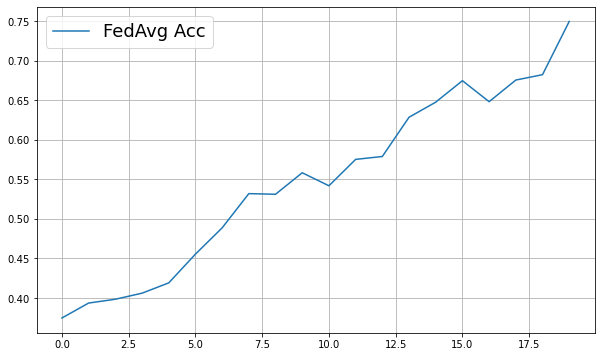

In [6]:
average_acc_list = []

for i in range(20):
    sum = 0
    for j in range(5):
        sum = np.mean(globals()['acc{}'.format(j)][i]) + sum

    average_acc_list.append(sum/5)  


plt.figure(figsize=(10,6))
plt.plot(average_acc_list[:], label='FedAvg Acc')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()

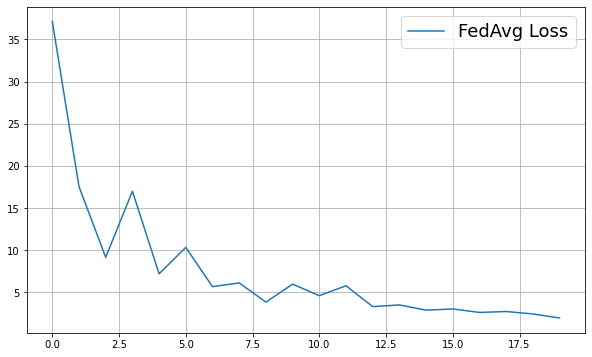

In [7]:
average_loss_list = []


for i in range(20):
    sum = 0
    for j in range(5):
        sum = np.mean(globals()['loss{}'.format(j)][i]) + sum

    average_loss_list.append(sum/5)  


plt.figure(figsize=(10,6))
plt.plot(average_loss_list[:], label='FedAvg Loss')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()